In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

## 1. Load Data

#### Load the dataset
  Initially there are 2 datasets one for red wine and one for white wine.  I added a column on each file for the type of wine it is represented in the file.
  I import the files and merge them with the pandas concat function.
  To avoid bias, the data the shuffle function is applied.

In [3]:
data_r = pd.read_csv('./Data/winequality-red.csv')
data_r.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0            7.4              0.70         0.00             1.9   
1     0            7.8              0.88         0.00             2.6   
2     0            7.8              0.76         0.04             2.3   
3     0           11.2              0.28         0.56             1.9   
4     0            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [4]:
data_w = pd.read_csv('./Data/winequality-white.csv')
data_w.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [5]:
frames = [data_r, data_w]
df = pd.concat(frames, ignore_index=True)
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0            7.4              0.70         0.00             1.9   
1     0            7.8              0.88         0.00             2.6   
2     0            7.8              0.76         0.04             2.3   
3     0           11.2              0.28         0.56             1.9   
4     0            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [6]:
df = shuffle(df)
df.head(20)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
5513     1            6.2             0.390         0.24            4.80   
116      0            8.3             0.540         0.28            1.90   
167      0            7.3             0.550         0.03            1.60   
3930     1            7.5             0.300         0.32            1.40   
2689     1            8.3             0.210         0.58           17.10   
6335     1            6.0             0.160         0.36            1.60   
3200     1            8.2             0.340         0.49            8.00   
349      0            9.1             0.785         0.00            2.60   
5422     1            6.7             0.260         0.49            8.10   
3674     1            7.6             0.180         0.36            2.40   
4851     1            7.1             0.260         0.37            5.50   
912      0           10.0             0.460         0.44            2.90   
166      0            6.8             0.640         0.10            2.10   
5475     1            6.1             0.220         0.28           16.55   
1471     0            6.7             0.700         0.08            3.75   
545      0            9.1             0.470         0.49            2.60   
308      0           10.3             0.430         0.44            2.40   
741      0            9.2             0.530         0.24            2.60   
1981     1            7.5             0.350         0.28            9.60   
4728     1            6.1             0.210         0.38            1.50   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
5513      0.037                 45.0                 138.0  0.99174  3.23   
116       0.077                 11.0                  40.0  0.99780  3.39   
167       0.072                 17.0                  42.0  0.99560  3.37   
3930      0.032                 31.0                 161.0  0.99154  2.95   
2689      0.049                 62.0                 213.0  1.00060  3.01   
6335      0.042                 13.0                  61.0  0.99143  3.22   
3200      0.046                 55.0                 223.0  0.99600  3.08   
349       0.093                 11.0                  28.0  0.99940  3.36   
5422      0.052                 48.0                 197.0  0.99558  3.19   
3674      0.049                 38.0                 123.0  0.99600  3.60   
4851      0.025                 31.0                 105.0  0.99082  3.06   
912       0.065                  4.0                   8.0  0.99674  3.33   
166       0.085                 18.0                 101.0  0.99560  3.34   
5475      0.059                 54.0                 135.0  0.99665  3.20   
1471      0.067                  8.0                  16.0  0.99334  3.43   
545       0.094                 38.0                 106.0  0.99820  3.08   
308       0.214                  5.0                  12.0  0.99940  3.19   
741       0.078                 28.0                 139.0  0.99788  3.21   
1981      0.051                 26.0                 157.0  0.99690  3.12   
4728      0.039                 37.0                 122.0  0.98972  3.20   

      sulphates  alcohol  quality  
5513       0.43     11.2        7  
116        0.61     10.0        6  
167        0.48      9.0        4  
3930       0.42     10.5        5  
2689       0.51      9.3        6  
6335       0.54     10.8        6  
3200       0.52     10.7        6  
349        0.86      9.4        6  
5422       0.48      9.5        5  
3674       0.46     10.3        5  
4851       0.33     12.6        8  
912        0.62     12.2        6  
166        0.52     10.2        5  
5475       0.38     10.5        5  
1471       0.52     12.6        5  
545        0.59      9.1        5  
308        0.63      9.5        6  
741        0.57      9.5        5  
1981       0.53      9.2        6  
4728       0.43     12.0        6

## 2. Visualize the Data - Data Exploration

- __2.1. General Information / Statistical Information  / Verify NULLS__
- __2.2. Data Distribution__
- __2.3. Create Boxplots__
- __2.4. Pariplot Data with column ['type']:__
- __2.5. Correlation Matrix__

#### 2.1 General Information / Statistical Information / Verify NULLS

In [7]:
print(f"\nINFO:\n")
print(df.info())
print("\nDESCRIBE:\n")
print(df.describe())
print("\nNULLS\n")
print(df.isnull().sum())


INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5513 to 5890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None

DESCRIBE:

              type  fixed acidity  volatile aci

#### 2.2 Data Distribution

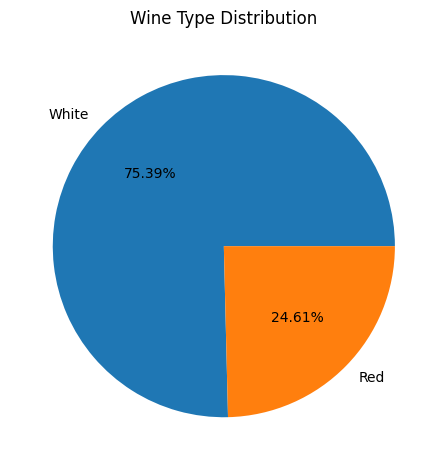

In [8]:
Types = df['type'].value_counts(normalize=True)
labels =['White','Red']
fig, ax = plt.subplots()
ax.pie(Types, labels=labels, autopct='%.2f%%')
ax.set_title('Wine Type Distribution')
plt.tight_layout()

#### 2.2 Create Boxplots

A boxplot is a graphical and standardised way to display the distribution of data based on five key numbers: 

- The “minimum”, 
- 1st Quartile (25th percentile)
- median (2nd Quartile./ 50th Percentile)
- 3rd Quartile (75th percentile)
- The “maximum”. 

The minimum and maximum values are defined as Q1–1.5 * IQR and Q3 + 1.5 * IQR respectively. Any points that fall outside of these limits are referred to as outliers.

<div>
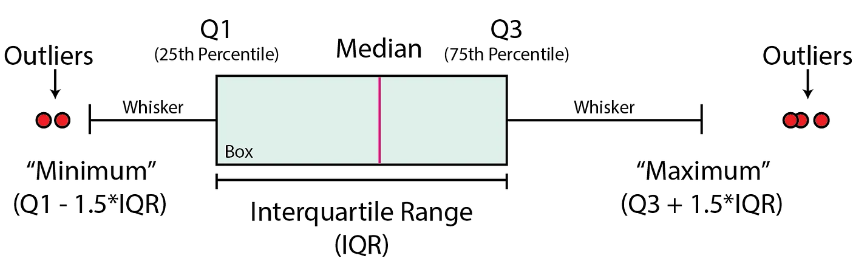
</div>

<br>

https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4

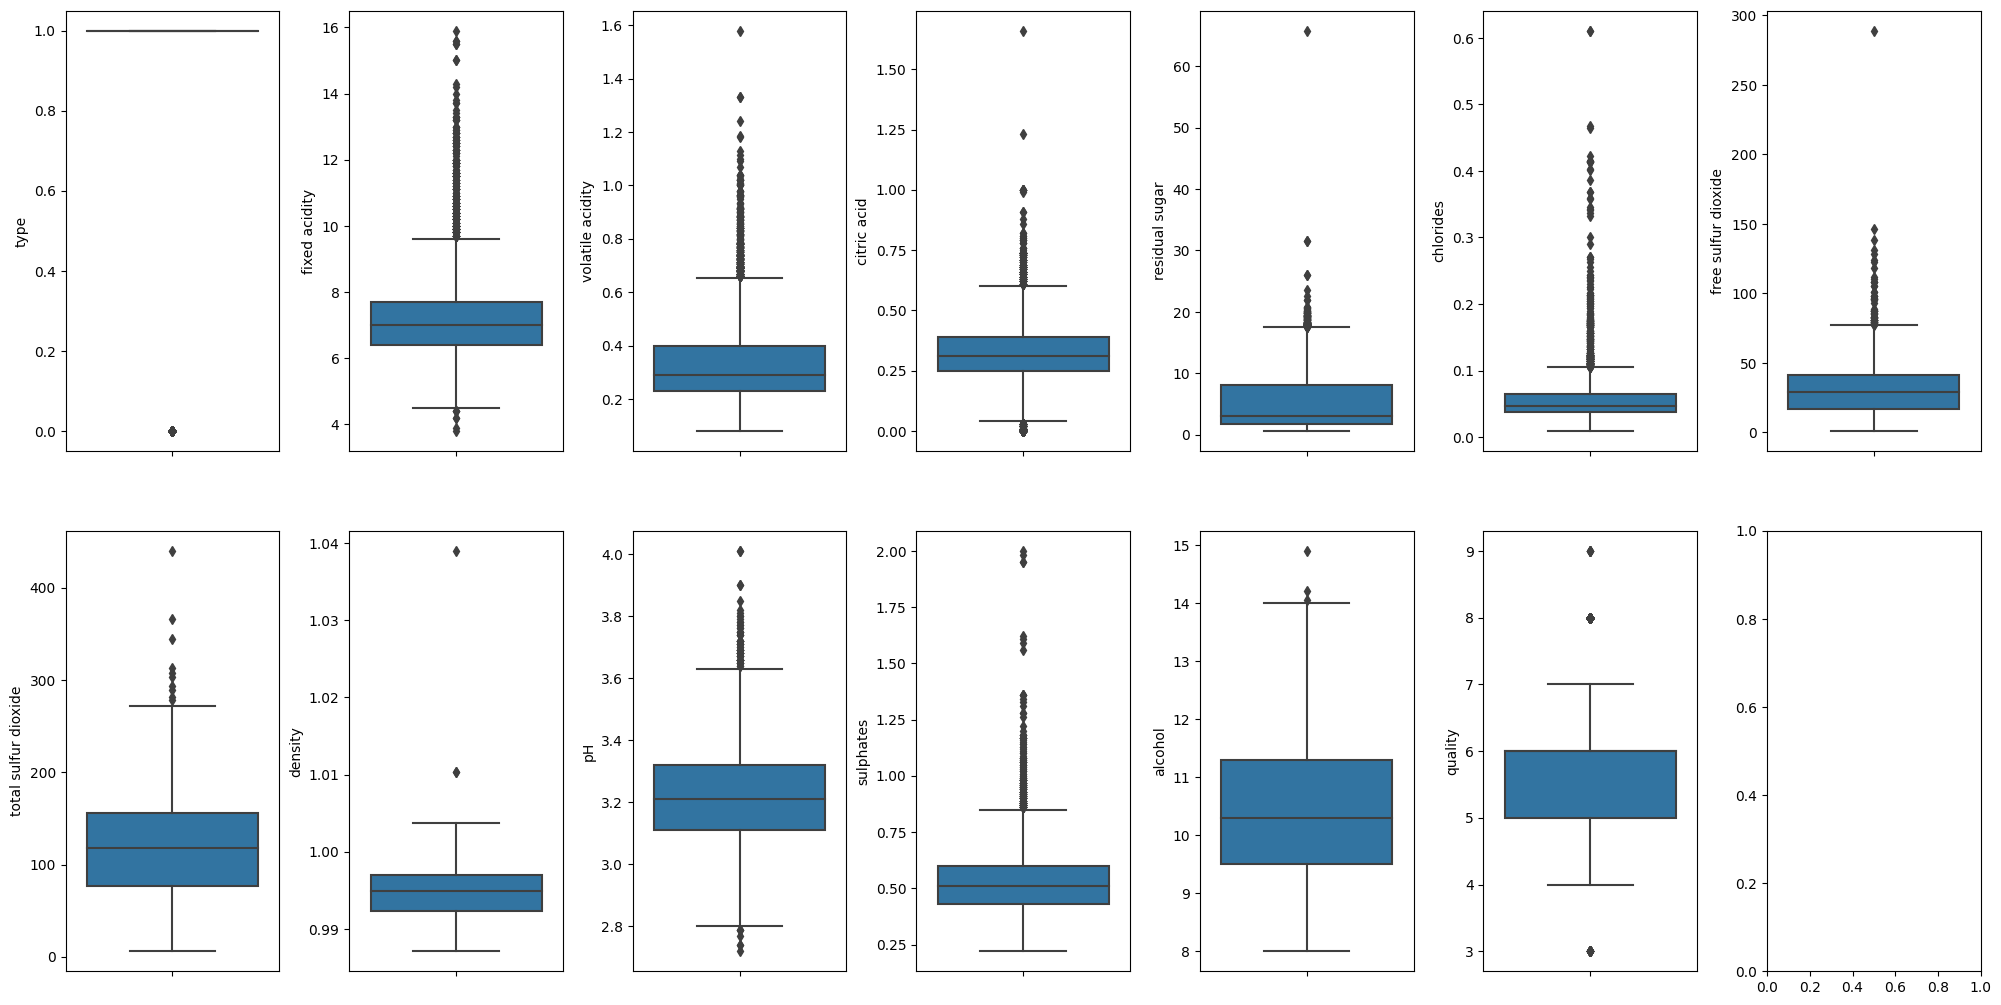

In [9]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))


index = 0
ax = ax.flatten()

for col, value in df.items():
    sb.boxplot(y=col, data=df, ax=ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

#### 2.3. Pairplot Data with column ['type']: 
By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

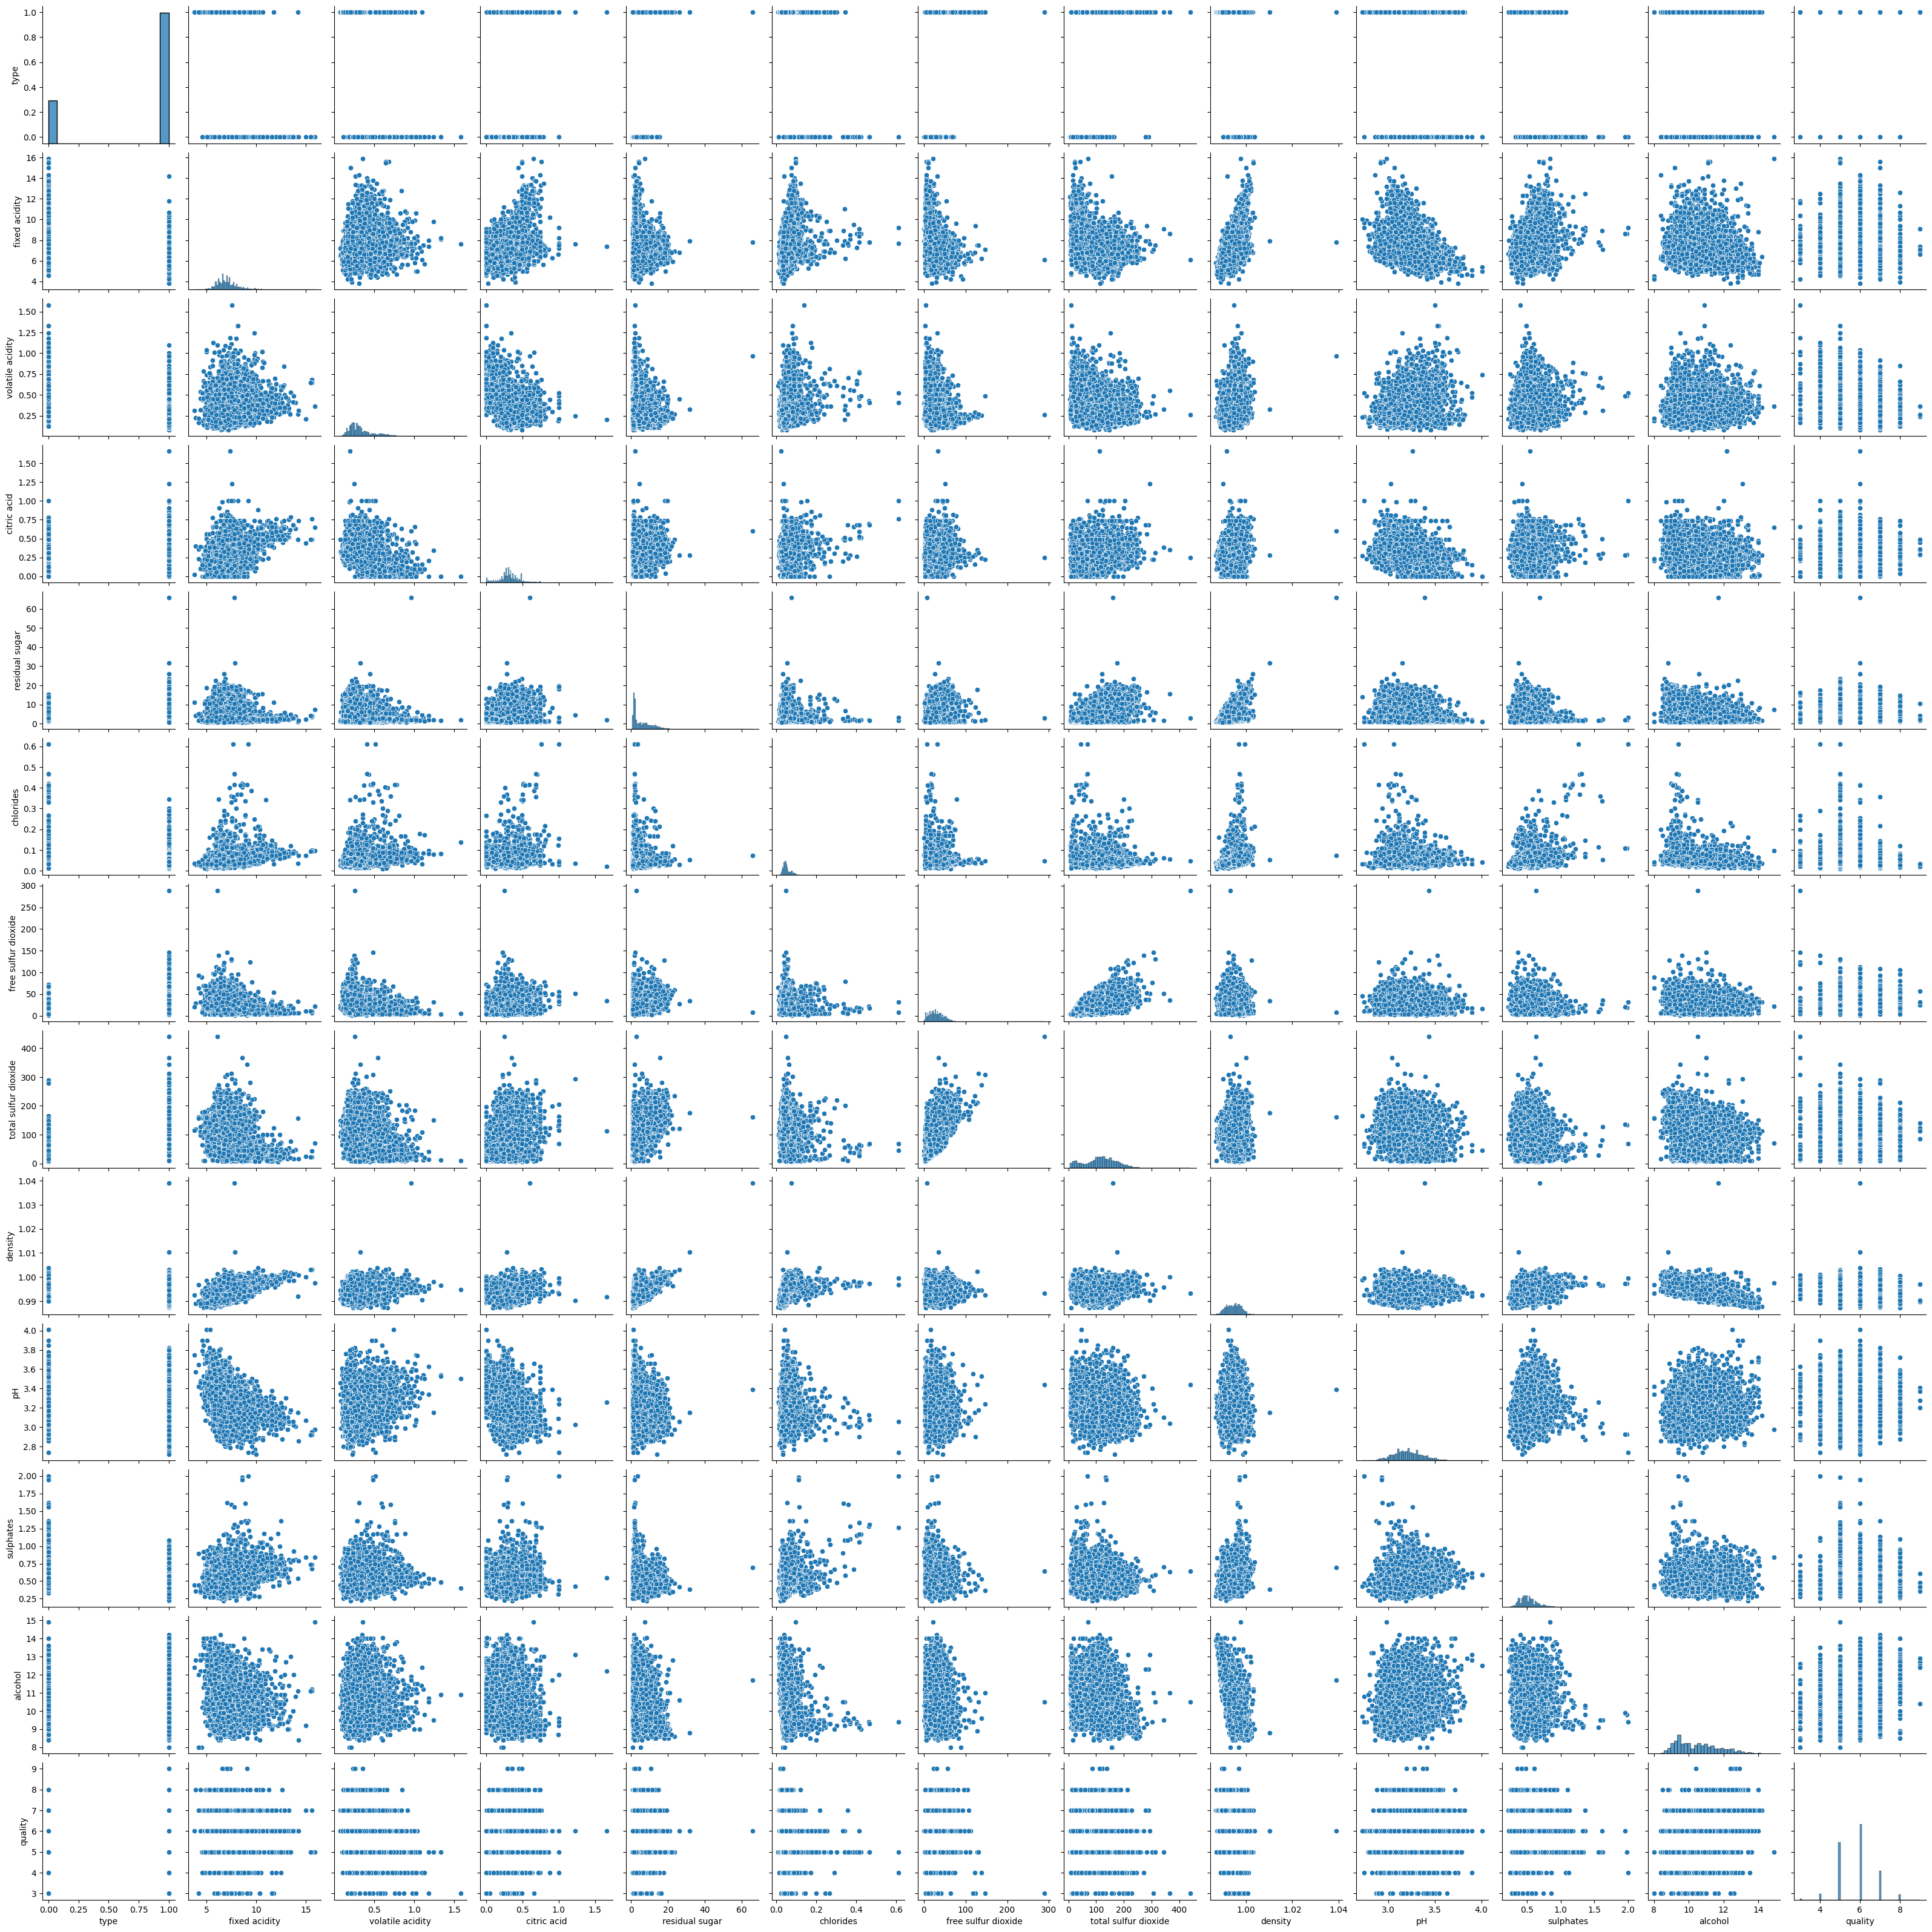

In [10]:
figsize=(10,5)
sb.pairplot(df)

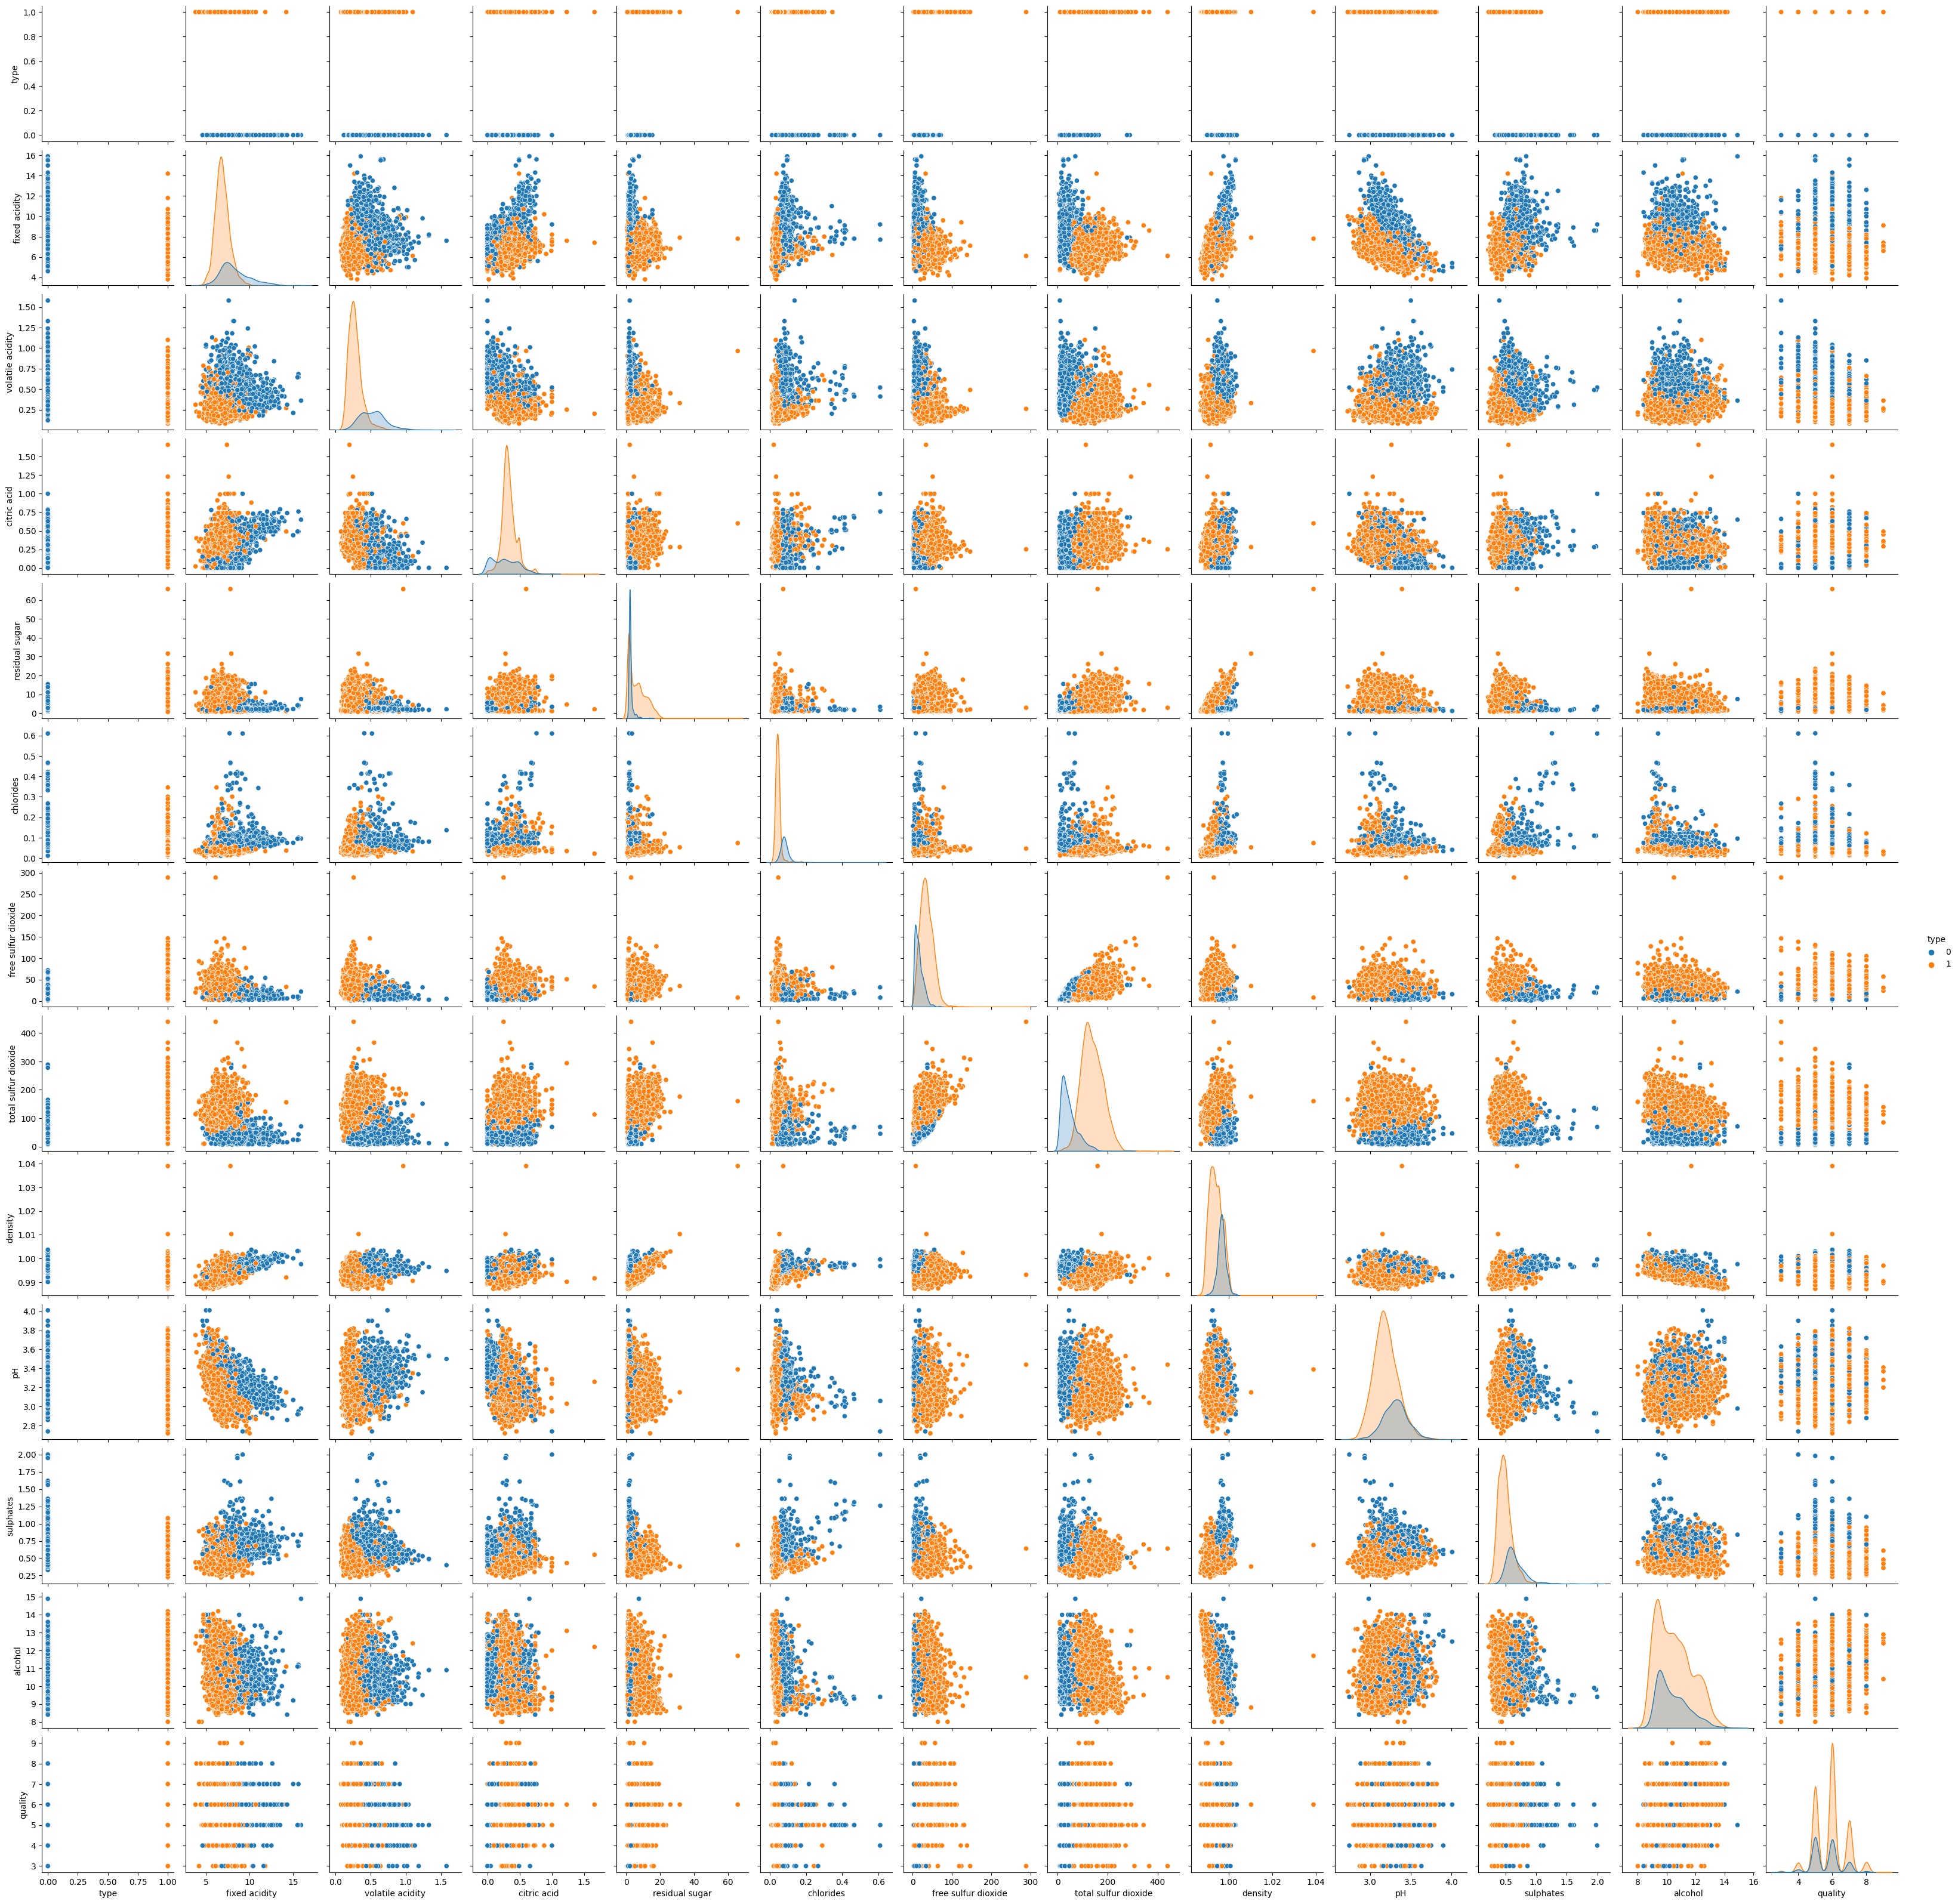

In [11]:
figsize=(10,5)
sb.pairplot(df, hue='type', vars=df.columns)

#### 2.4 Correlation Matrix
  A correlation matrix is a table containing correlation coefficients for many variables. Each cell in the table represents the correlation between two variables. The value might range between -1 and 1. A correlation matrix is used for summarizing the data, diagnose the advanced analysis, and as an input for a more complicated study.
  One way to quantify this relationship is to use the Pearson correlation coefficient, which is a measure of the linear association between two variables. It has a value between -1 and 1 where:

-1 indicates a perfectly negative linear correlation between two variables    
  0 indicates no linear correlation between two variables<br>
  1 indicates a perfectly positive linear correlation between two variables
  
  The further away the correlation coefficient is from zero, the stronger the relationship between the two variables.
  
<br>

https://www.statology.org/how-to-read-a-correlation-matrix/

In [12]:
df.corr()['type'].sort_values(ascending=True)

volatile acidity       -0.653036
chlorides              -0.512678
sulphates              -0.487218
fixed acidity          -0.486740
density                -0.390645
pH                     -0.329129
alcohol                 0.032970
quality                 0.119323
citric acid             0.187397
residual sugar          0.348821
free sulfur dioxide     0.471644
total sulfur dioxide    0.700357
type                    1.000000
Name: type, dtype: float64

<AxesSubplot: >

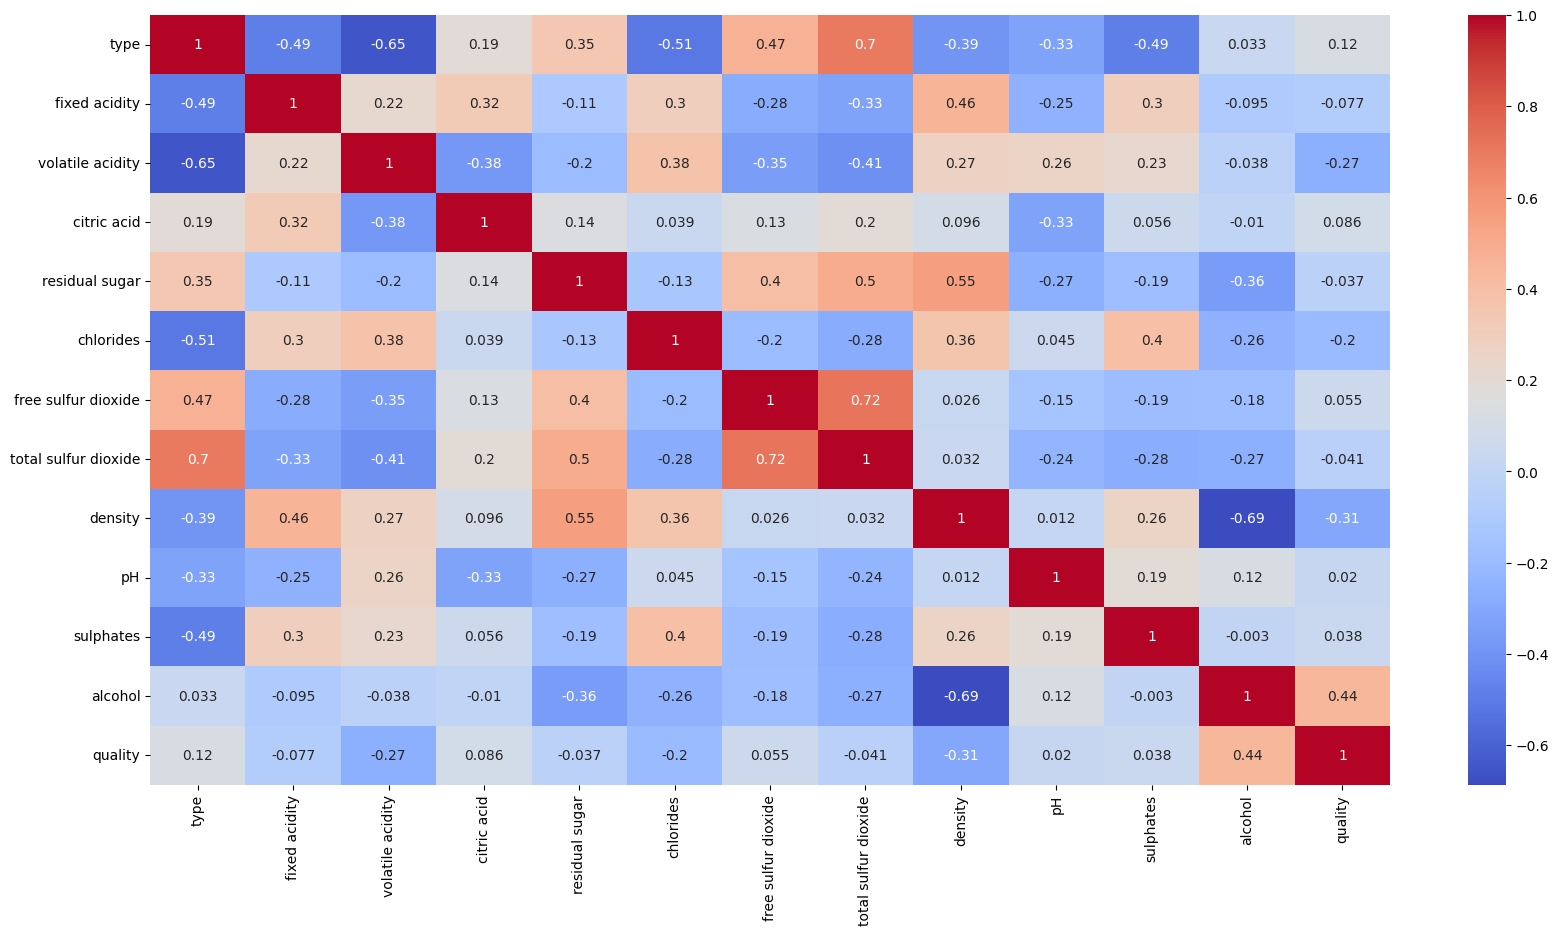

In [13]:
corr = df.corr()
plt.figure(figsize=(20,10))
sb.heatmap(corr, annot=True, cmap='coolwarm')

## 3. Splitting the data for Training and Testing


In [14]:
X = df.drop(columns=['type'])
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10, stratify=y)

## 4. Testing Multiple Models

__4.1 KNeighborsClassifier__<br>
__4.2 DecisionTreeClassifier__<br>
__4.3 RandomForestClassifier__<br>
__4.4 Support Vector Machines__<br>
__4.5 GaussianNB__


In [15]:
### Function create_model

def create_model(estimator_object, Results):
    
    
    """
    create_model: this function will call a model and store the results in the Results dict.
    
    Parameters: estimator_object, is the model that will be used.
                Results: dictionary that already have the name of the model as a key.
    
    Output: The Results dictionary will have the estimator name and the Cross Validation Mean (CVM),
            Cross Validation Standard Deviation (CVS), Precision of Red Wine (P_R) and Precison of White Wine (P_W).
    
    
    """
    print ("--------- Estimator: ",estimator_object, "--------------")
    estimator = estimator_object
    estimator.fit(X_train, y_train)
    pred_estimator = estimator.predict(X_test)
    print('\nAccuracy Score:', accuracy_score(y_test, pred_estimator))
    cm = confusion_matrix(y_test, pred_estimator)
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, pred_estimator))
    print('\nClassification Report:\n', classification_report(y_test, pred_estimator))
    report = classification_report(y_test, pred_estimator, output_dict=True)
    type_0 =  report['0']['precision'] 
    type_1 =  report['1']['precision'] 
    cross_val = cross_val_score(estimator=estimator, X=X_test, y=y_test, cv=30)
    CVM = cross_val.mean()
    CVS = cross_val.std()
    print(f'\nMean accuracy:\n{CVM:.2%}')
    print(f'\nStandard deviation:\n {CVS:.2%}')

    Results['CVM'].append(CVM)
    Results['CVS'].append(CVS)
    Results['P_R'].append(type_0)
    Results['P_W'].append(type_1)
    
    figsize=(10,5)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

In [16]:
estimators = {
     'KNeighborsClassifier': KNeighborsClassifier() , 
     'DecisionTreeClassifier': DecisionTreeClassifier(),
     'RandomForestClassifier': RandomForestClassifier(),
     'SVC': SVC(gamma='scale'),
     'GaussianNB': GaussianNB()
}

Results = {}
Results = {'Estimator': [key for key in estimators], 'CVM': [], 'CVS': [], 'P_R': [], 'P_W': []}

--------- Estimator:  KNeighborsClassifier() --------------

Accuracy Score: 0.943076923076923

Confusion Matrix:
 [[275  45]
 [ 29 951]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       320
           1       0.95      0.97      0.96       980

    accuracy                           0.94      1300
   macro avg       0.93      0.91      0.92      1300
weighted avg       0.94      0.94      0.94      1300


Mean accuracy:
93.85%

Standard deviation:
 3.19%


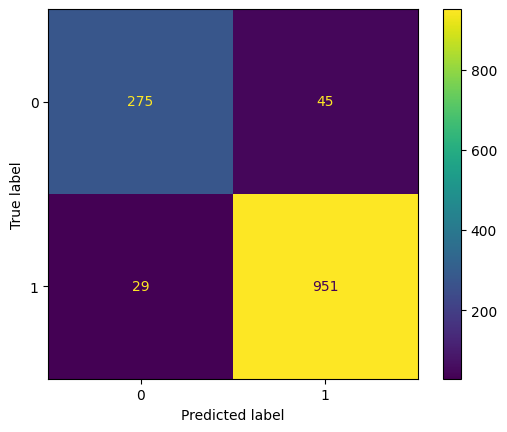

--------- Estimator:  DecisionTreeClassifier() --------------

Accuracy Score: 0.9846153846153847

Confusion Matrix:
 [[310  10]
 [ 10 970]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       320
           1       0.99      0.99      0.99       980

    accuracy                           0.98      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300


Mean accuracy:
98.31%

Standard deviation:
 1.77%


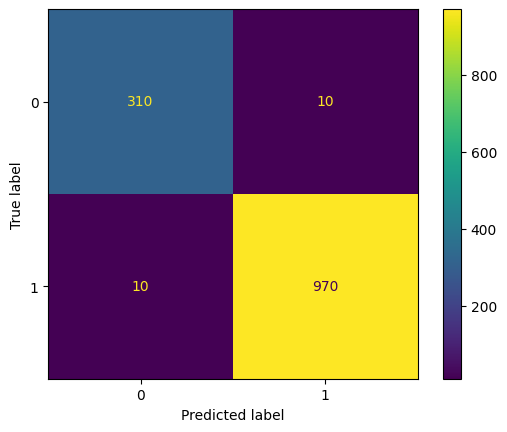

--------- Estimator:  RandomForestClassifier() --------------

Accuracy Score: 0.9961538461538462

Confusion Matrix:
 [[315   5]
 [  0 980]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       320
           1       0.99      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300


Mean accuracy:
99.54%

Standard deviation:
 1.10%


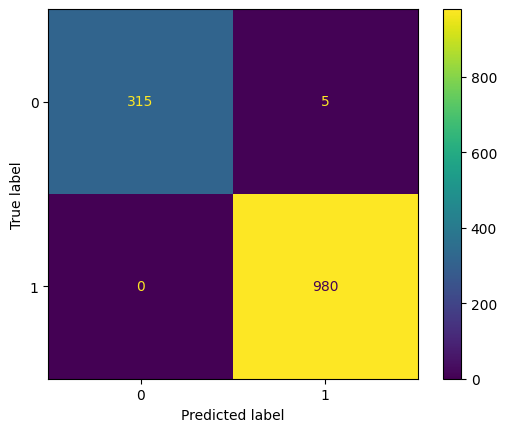

--------- Estimator:  SVC() --------------

Accuracy Score: 0.9407692307692308

Confusion Matrix:
 [[261  59]
 [ 18 962]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.87       320
           1       0.94      0.98      0.96       980

    accuracy                           0.94      1300
   macro avg       0.94      0.90      0.92      1300
weighted avg       0.94      0.94      0.94      1300


Mean accuracy:
93.39%

Standard deviation:
 3.33%


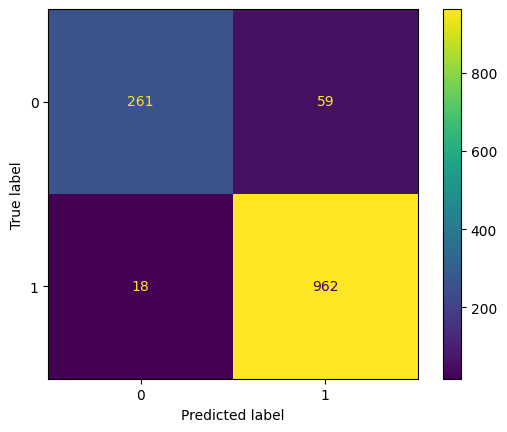

--------- Estimator:  GaussianNB() --------------

Accuracy Score: 0.9792307692307692

Confusion Matrix:
 [[314   6]
 [ 21 959]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       320
           1       0.99      0.98      0.99       980

    accuracy                           0.98      1300
   macro avg       0.97      0.98      0.97      1300
weighted avg       0.98      0.98      0.98      1300


Mean accuracy:
98.01%

Standard deviation:
 1.93%


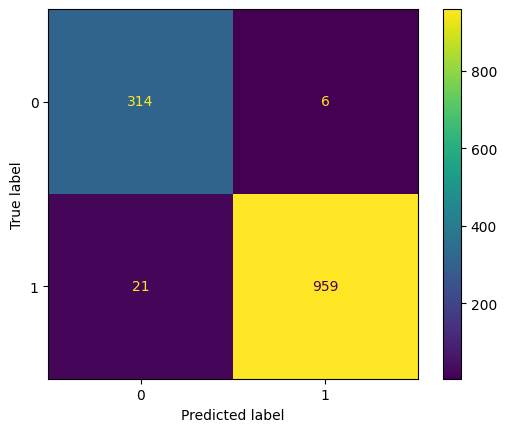

In [17]:
for estimator in estimators:
    create_model(estimators[estimator],Results)

In [18]:
print(type(Results))
Results

<class 'dict'>


{'Estimator': ['KNeighborsClassifier',
  'DecisionTreeClassifier',
  'RandomForestClassifier',
  'SVC',
  'GaussianNB'],
 'CVM': [0.9385482734319944,
  0.983139534883721,
  0.99538407329105,
  0.9339147286821705,
  0.980091613812544],
 'CVS': [0.03191675259776514,
  0.017745320718701014,
  0.011013403599861589,
  0.033297673110863305,
  0.019344095414292002],
 'P_R': [0.9046052631578947,
  0.96875,
  1.0,
  0.9354838709677419,
  0.9373134328358209],
 'P_W': [0.9548192771084337,
  0.9897959183673469,
  0.9949238578680203,
  0.9422135161606269,
  0.9937823834196892]}

In [19]:
Results_df = pd.DataFrame(Results)
Results_df

Estimator       CVM       CVS       P_R       P_W
0    KNeighborsClassifier  0.938548  0.031917  0.904605  0.954819
1  DecisionTreeClassifier  0.983140  0.017745  0.968750  0.989796
2  RandomForestClassifier  0.995384  0.011013  1.000000  0.994924
3                     SVC  0.933915  0.033298  0.935484  0.942214
4              GaussianNB  0.980092  0.019344  0.937313  0.993782

In [20]:
# set index using column
Results_df = Results_df.set_index('Estimator')
Results_df

CVM       CVS       P_R       P_W
Estimator                                                     
KNeighborsClassifier    0.938548  0.031917  0.904605  0.954819
DecisionTreeClassifier  0.983140  0.017745  0.968750  0.989796
RandomForestClassifier  0.995384  0.011013  1.000000  0.994924
SVC                     0.933915  0.033298  0.935484  0.942214
GaussianNB              0.980092  0.019344  0.937313  0.993782

Text(0, 0.5, 'Score')

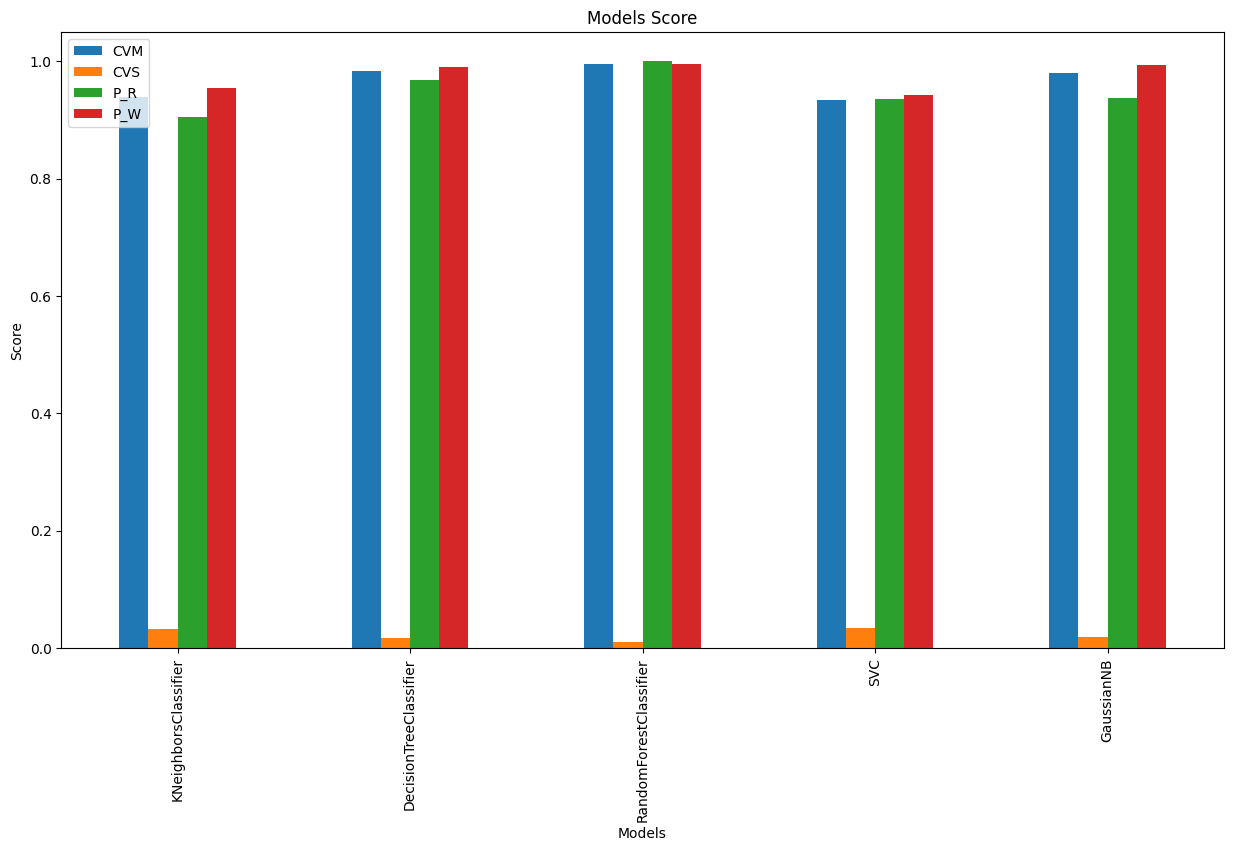

In [21]:
Results_df.plot(kind="bar",figsize=(15, 8))
plt.title("Models Score")
plt.xlabel("Models")
plt.ylabel("Score")

In [22]:
#print(Results_df['CVS'])
Res_CVS=Results_df['CVS']
print(Res_CVS)

Estimator
KNeighborsClassifier      0.031917
DecisionTreeClassifier    0.017745
RandomForestClassifier    0.011013
SVC                       0.033298
GaussianNB                0.019344
Name: CVS, dtype: float64


Text(0, 0.5, 'Score')

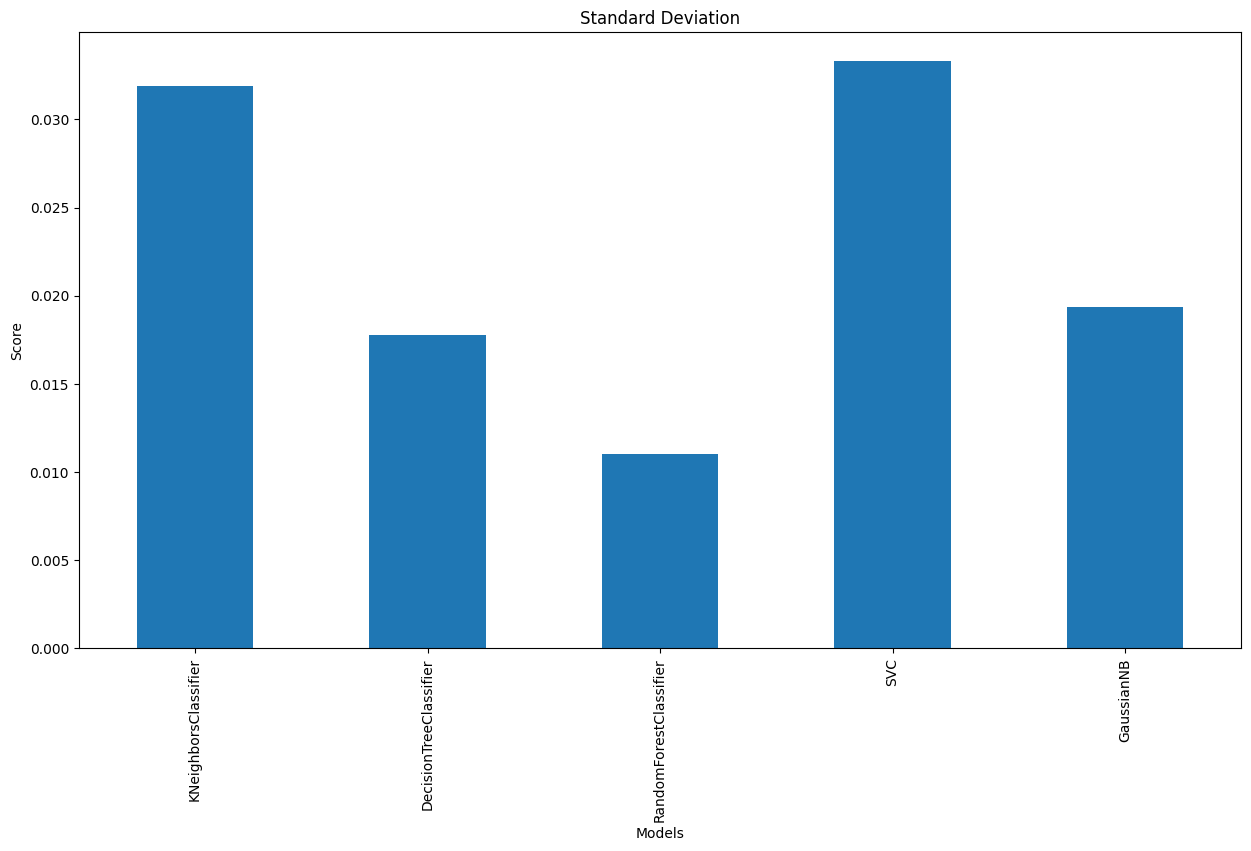

In [23]:
Res_CVS.plot(kind="bar",figsize=(15, 8))
plt.title("Standard Deviation")
plt.xlabel("Models")
plt.ylabel("Score")

## 5. Testing The Models using KFold



<div>
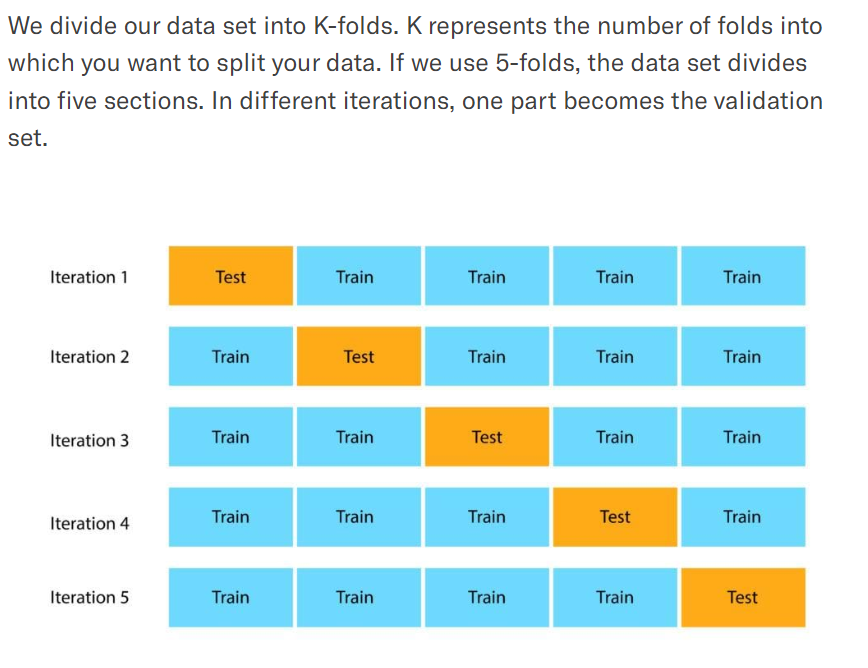
</div>

<br>
In each set (fold) training and the test would be performed precisely once during this entire process. It helps us to avoid overfitting. As we know when a model is trained using all of the data in a single short and give the best performance accuracy. To resist this k-fold cross-validation helps us to build the model is a generalized one.<br>


https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/<br>

https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/
  


In [24]:
Results_KFold={}
Results_KFold = {'Estimator': [key + "_Kfold" for key in estimators], 'CVM': [], 'CVS': []}

In [25]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=X, y=y, cv=kfold)
    print(f'{estimator_name:>25}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}') 
    Results_KFold['CVM'].append(scores.mean())
    Results_KFold['CVS'].append(scores.std())

     KNeighborsClassifier: mean accuracy=94.47%; standard deviation=0.92%
   DecisionTreeClassifier: mean accuracy=98.65%; standard deviation=0.37%
   RandomForestClassifier: mean accuracy=99.52%; standard deviation=0.22%
                      SVC: mean accuracy=93.60%; standard deviation=0.68%
               GaussianNB: mean accuracy=97.09%; standard deviation=0.83%


In [26]:
Results_KFold_df = pd.DataFrame(Results_KFold)
Results_KFold_df = Results_KFold_df.set_index('Estimator')

#Results_df = pd.DataFrame(Results)
#Results_df = Results_df.set_index('Estimator')
Results_KFold_df

CVM       CVS
Estimator                                       
KNeighborsClassifier_Kfold    0.944747  0.009199
DecisionTreeClassifier_Kfold  0.986456  0.003692
RandomForestClassifier_Kfold  0.995230  0.002223
SVC_Kfold                     0.935973  0.006835
GaussianNB_Kfold              0.970913  0.008292

Text(0, 0.5, 'Score')

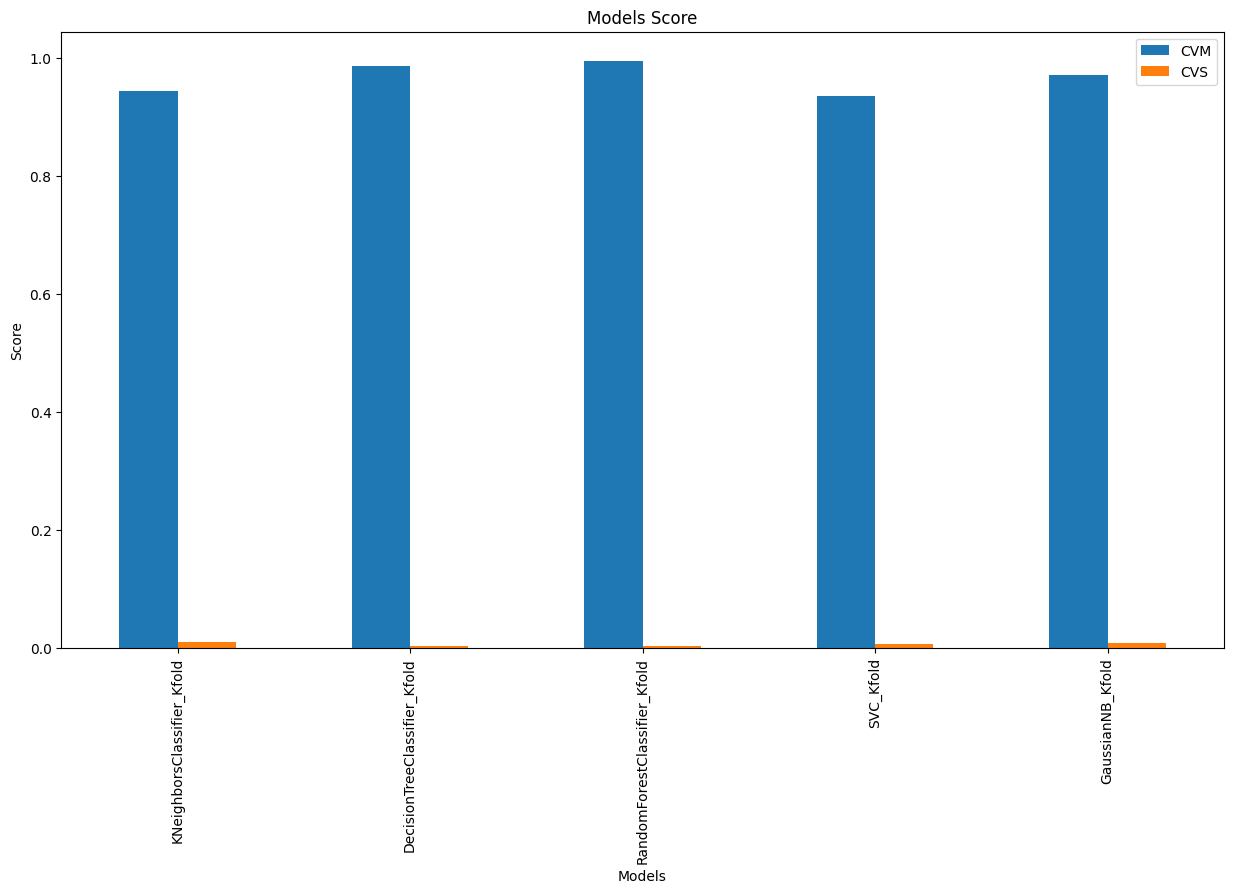

In [27]:
Results_KFold_df.plot(kind="bar",figsize=(15, 8))
plt.title("Models Score")
plt.xlabel("Models")
plt.ylabel("Score")

In [28]:
#print(Results_df['CVS'])
Res_KFold_CVS = Results_KFold_df['CVS']
print(Res_KFold_CVS)

Estimator
KNeighborsClassifier_Kfold      0.009199
DecisionTreeClassifier_Kfold    0.003692
RandomForestClassifier_Kfold    0.002223
SVC_Kfold                       0.006835
GaussianNB_Kfold                0.008292
Name: CVS, dtype: float64


Text(0, 0.5, 'Score')

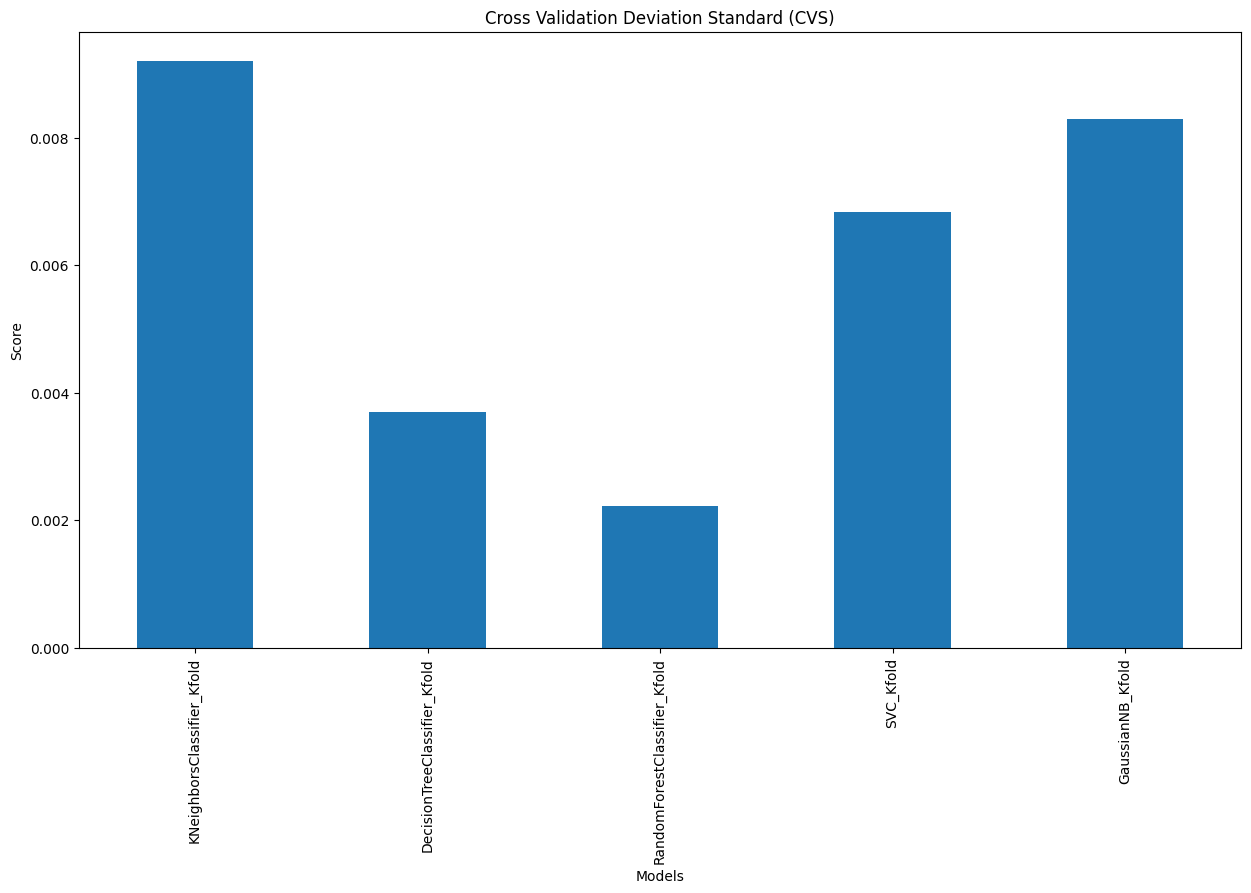

In [29]:
Res_KFold_CVS.plot(kind="bar",figsize=(15, 8))
plt.title("Cross Validation Deviation Standard (CVS)")
plt.xlabel("Models")
plt.ylabel("Score")

## 6. Hyperparameters Tuning using GridSearchCV and RandomizedSearchCV on each Model

In [30]:
#KNeighborsClassifier
param_grid_KNeighborsClassifier = {'n_neighbors': list(range(1, 31)),
              'weights' :['uniform', 'distance']}

#Parameters DecisonTreeClassifier
param_grid_DecisionTreeClassifier = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']}

#Parameters RandomForestClassifier
param_grid_RandomForestClassifier = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]}

#SVC
param_grid_SVC = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 

#GaussianNB
param_grid_GaussianNB = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}



hyper_parameters_estimators = {
    'KNeighborsClassifier': [KNeighborsClassifier(), param_grid_KNeighborsClassifier],
    'DecisionTreeClassifier': [DecisionTreeClassifier(), param_grid_DecisionTreeClassifier],
    'RandomForestClassifier': [RandomForestClassifier(), param_grid_RandomForestClassifier],
    'SVC': [SVC(),param_grid_SVC],
    'GaussianNB': [GaussianNB(), param_grid_GaussianNB]}

hpe_df = pd.DataFrame(hyper_parameters_estimators)
hpe_df

KNeighborsClassifier  \
0                             KNeighborsClassifier()   
1  {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10...   

                              DecisionTreeClassifier  \
0                           DecisionTreeClassifier()   
1  {'max_features': ['sqrt', 'log2'], 'ccp_alpha'...   

                              RandomForestClassifier  \
0                           RandomForestClassifier()   
1  {'n_estimators': [25, 50, 100, 150], 'max_feat...   

                                                 SVC  \
0                                              SVC()   
1  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0....   

                                          GaussianNB  
0                                       GaussianNB()  
1  {'var_smoothing': [0.01, 0.001, 0.0001, 1e-05,...

In [31]:
#prints how to select the hyperparameters to use the funciont get_hyper_tuning and find the best get_hyper_tuningnable parameters
for estimator in estimators.keys():
#    print(estimator)
    Model = hpe_df[estimator][0]
    Parameters = hpe_df[estimator][1]
    print("Estimator",estimator,"\n")
    print("Model", Model, "\n")
    print("Parameters", Parameters, "\n")

Estimator KNeighborsClassifier 

Model KNeighborsClassifier() 

Parameters {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']} 

Estimator DecisionTreeClassifier 

Model DecisionTreeClassifier() 

Parameters {'max_features': ['sqrt', 'log2'], 'ccp_alpha': [0.1, 0.01, 0.001], 'max_depth': [5, 6, 7, 8, 9], 'criterion': ['gini', 'entropy']} 

Estimator RandomForestClassifier 

Model RandomForestClassifier() 

Parameters {'n_estimators': [25, 50, 100, 150], 'max_features': ['sqrt', 'log2', None], 'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9]} 

Estimator SVC 

Model SVC() 

Parameters {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear']} 

Estimator GaussianNB 

Model GaussianNB() 

Parameters {'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]} 



In [32]:
def get_hyper_tuning (name, estimator, param_grid, Result):
    
    """
    get_hyper_tuning: will get the estimator and gather the results for the best
                      Hyper Tunning Parameters using GridSearchCV and RandomizedSearchCV.
       
    Parameters: name: name of the estimator as a string
                estimator: object or estimator method
                param_grid: a dictionary of lists with the differetn parameters
                Result: a dictionary that already has the keys as the estimators that will be tested.
    
    Output: The Result dictionary will get the best tunning hyperparameters from the best_estimator from
            GridSearchCV and RandomizedSearchCV.
    """
    
    grid = GridSearchCV(estimator, param_grid, refit = True)
    grid.fit(X_train, y_train)
    print("\nModel -------------",name,"------------------\n")
    print("GridSearchCV\n")
    Grid_Best_Est = grid.best_estimator_
    print(f'{"Best Estimator:  ":>25}' + f'{Grid_Best_Est}')
    print(f'{"Best Score:  ":>25}' + f'{grid.best_score_}')
    print(f'{"Best Parameters:  ":>25}' + f'{grid.best_params_}')
    pred_optimized = grid.predict(X_test)
    print("\nOptimized Best Parameters:\n ", classification_report(y_test, pred_optimized))
    Result[name + '_Grid'] = Grid_Best_Est
    
    rs=RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, n_iter=60, cv=3, random_state=42)
    rs.fit(X_train, y_train)
    print("\nRandomizedSearchCV\n")
    RS_Best_Est = rs.best_estimator_
    print(f'{"Best Estimator:  ":>25}' + f'{RS_Best_Est}')
    print(f'{"Best Score:  ":>25}' + f'{rs.best_score_}')
    print(f'{"Best Parameters:  ":>25}' + f'{rs.best_params_}')
    pred_optimized = rs.predict(X_test)
    print("\nOptimized Best Parameters:\n ", classification_report(y_test, pred_optimized))
    Result[name + '_RS'] = RS_Best_Est
    

In [33]:
get_hyper_tuningPar = {}
get_hyper_tuningPar

{}

In [34]:
get_hyper_tuning('KNeighborsClassifier',KNeighborsClassifier(),param_grid_KNeighborsClassifier,get_hyper_tuningPar)
get_hyper_tuning('DecisionTreeClassifier',DecisionTreeClassifier(), param_grid_DecisionTreeClassifier,get_hyper_tuningPar)
get_hyper_tuning('RandomForestClassifier',RandomForestClassifier(), param_grid_RandomForestClassifier,get_hyper_tuningPar)
get_hyper_tuning('SVC',SVC(), param_grid_SVC,get_hyper_tuningPar)
get_hyper_tuning('GaussianNB', GaussianNB(), param_grid_GaussianNB,get_hyper_tuningPar)


Model ------------- KNeighborsClassifier ------------------

GridSearchCV

        Best Estimator:  KNeighborsClassifier(n_neighbors=10, weights='distance')
            Best Score:  0.9520861405197305
       Best Parameters:  {'n_neighbors': 10, 'weights': 'distance'}

Optimized Best Parameters:
                precision    recall  f1-score   support

           0       0.92      0.88      0.90       320
           1       0.96      0.98      0.97       980

    accuracy                           0.95      1300
   macro avg       0.94      0.93      0.94      1300
weighted avg       0.95      0.95      0.95      1300


RandomizedSearchCV

        Best Estimator:  KNeighborsClassifier(n_neighbors=6, weights='distance')
            Best Score:  0.9457376996020287
       Best Parameters:  {'weights': 'distance', 'n_neighbors': 6}

Optimized Best Parameters:
                precision    recall  f1-score   support

           0       0.93      0.89      0.91       320
           1       0.

C:\Users\v_moreno\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 50 is smaller than n_iter=60. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



RandomizedSearchCV

        Best Estimator:  SVC(C=10, gamma=1, kernel='linear')
            Best Score:  0.9882620880636576
       Best Parameters:  {'kernel': 'linear', 'gamma': 1, 'C': 10}

Optimized Best Parameters:
                precision    recall  f1-score   support

           0       0.98      0.98      0.98       320
           1       0.99      0.99      0.99       980

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300


Model ------------- GaussianNB ------------------

GridSearchCV

        Best Estimator:  GaussianNB(var_smoothing=1e-11)
            Best Score:  0.9730597097801139
       Best Parameters:  {'var_smoothing': 1e-11}

Optimized Best Parameters:
                precision    recall  f1-score   support

           0       0.95      0.98      0.96       320
           1       0.99      0.98      0.99       980

    accuracy                           

C:\Users\v_moreno\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 14 is smaller than n_iter=60. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



RandomizedSearchCV

        Best Estimator:  GaussianNB(var_smoothing=1e-11)
            Best Score:  0.9709437371816484
       Best Parameters:  {'var_smoothing': 1e-11}

Optimized Best Parameters:
                precision    recall  f1-score   support

           0       0.95      0.98      0.96       320
           1       0.99      0.98      0.99       980

    accuracy                           0.98      1300
   macro avg       0.97      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300



In [35]:
get_hyper_tuningPar

{'KNeighborsClassifier_Grid': KNeighborsClassifier(n_neighbors=10, weights='distance'),
 'KNeighborsClassifier_RS': KNeighborsClassifier(n_neighbors=6, weights='distance'),
 'DecisionTreeClassifier_Grid': DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                        max_features='log2'),
 'DecisionTreeClassifier_RS': DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                        max_features='log2'),
 'RandomForestClassifier_Grid': RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=25),
 'RandomForestClassifier_RS': RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=50),
 'SVC_Grid': SVC(C=10, gamma=1, kernel='linear'),
 'SVC_RS': SVC(C=10, gamma=1, kernel='linear'),
 'GaussianNB_Grid': GaussianNB(var_smoothing=1e-11),
 'GaussianNB_RS': GaussianNB(var_smoothing=1e-11)}

In [36]:
for i in get_hyper_tuningPar.keys():
    print("\n--------",i)
    print(get_hyper_tuningPar[i])



-------- KNeighborsClassifier_Grid
KNeighborsClassifier(n_neighbors=10, weights='distance')

-------- KNeighborsClassifier_RS
KNeighborsClassifier(n_neighbors=6, weights='distance')

-------- DecisionTreeClassifier_Grid
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2')

-------- DecisionTreeClassifier_RS
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2')

-------- RandomForestClassifier_Grid
RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=25)

-------- RandomForestClassifier_RS
RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=50)

-------- SVC_Grid
SVC(C=10, gamma=1, kernel='linear')

-------- SVC_RS
SVC(C=10, gamma=1, kernel='linear')

-------- GaussianNB_Grid
GaussianNB(var_smoothing=1e-11)

-------- GaussianNB_RS
GaussianNB(var_smoothing=1e-11)


KNeighborsClassifier_Grid
Name KNeighborsClassifier(n_neighbors=10, weights='distance') 

--------- Estimator:  KNeighborsClassifier(n_neighbors=10, weights='distance') --------------

Accuracy Score: 0.953076923076923

Confusion Matrix:
 [[282  38]
 [ 23 957]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       320
           1       0.96      0.98      0.97       980

    accuracy                           0.95      1300
   macro avg       0.94      0.93      0.94      1300
weighted avg       0.95      0.95      0.95      1300


Mean accuracy:
94.24%

Standard deviation:
 2.82%


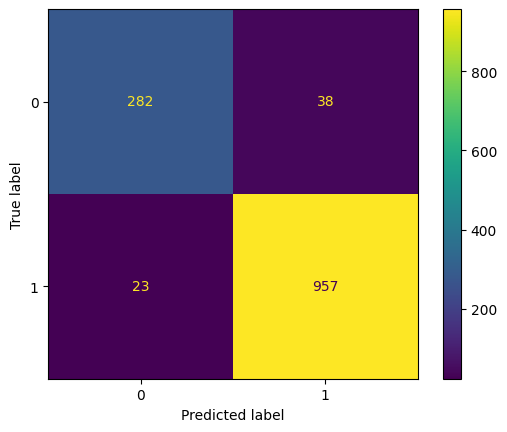

KNeighborsClassifier_RS
Name KNeighborsClassifier(n_neighbors=6, weights='distance') 

--------- Estimator:  KNeighborsClassifier(n_neighbors=6, weights='distance') --------------

Accuracy Score: 0.9546153846153846

Confusion Matrix:
 [[284  36]
 [ 23 957]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       320
           1       0.96      0.98      0.97       980

    accuracy                           0.95      1300
   macro avg       0.94      0.93      0.94      1300
weighted avg       0.95      0.95      0.95      1300


Mean accuracy:
94.08%

Standard deviation:
 2.68%


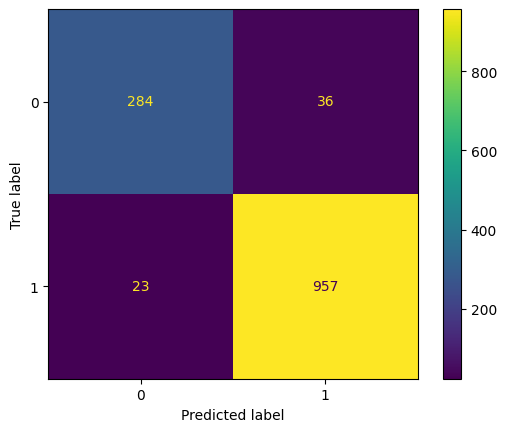

DecisionTreeClassifier_Grid
Name DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2') 

--------- Estimator:  DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2') --------------

Accuracy Score: 0.9769230769230769

Confusion Matrix:
 [[301  19]
 [ 11 969]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       320
           1       0.98      0.99      0.98       980

    accuracy                           0.98      1300
   macro avg       0.97      0.96      0.97      1300
weighted avg       0.98      0.98      0.98      1300


Mean accuracy:
97.39%

Standard deviation:
 2.20%


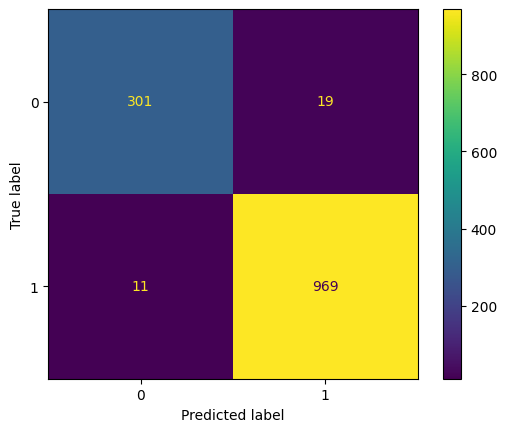

DecisionTreeClassifier_RS
Name DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2') 

--------- Estimator:  DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2') --------------

Accuracy Score: 0.9815384615384616

Confusion Matrix:
 [[307  13]
 [ 11 969]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       320
           1       0.99      0.99      0.99       980

    accuracy                           0.98      1300
   macro avg       0.98      0.97      0.98      1300
weighted avg       0.98      0.98      0.98      1300


Mean accuracy:
97.70%

Standard deviation:
 2.05%


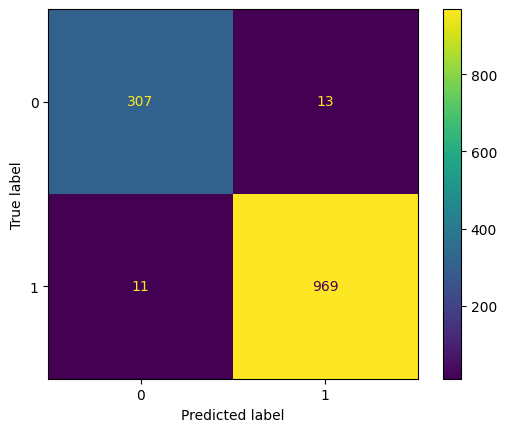

RandomForestClassifier_Grid
Name RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=25) 

--------- Estimator:  RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=25) --------------

Accuracy Score: 0.9884615384615385

Confusion Matrix:
 [[306  14]
 [  1 979]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       320
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300


Mean accuracy:
98.85%

Standard deviation:
 1.43%


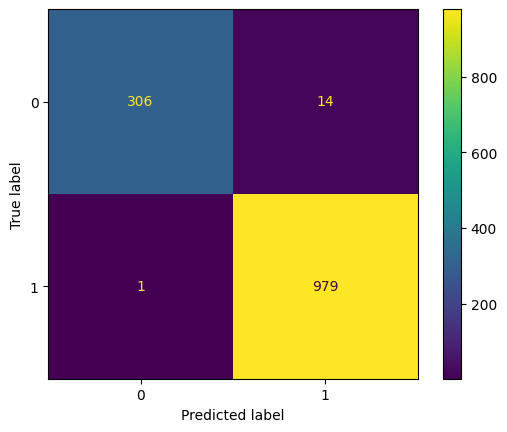

RandomForestClassifier_RS
Name RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=50) 

--------- Estimator:  RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=50) --------------

Accuracy Score: 0.99

Confusion Matrix:
 [[309  11]
 [  2 978]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       320
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.99      1300
weighted avg       0.99      0.99      0.99      1300


Mean accuracy:
99.00%

Standard deviation:
 1.29%


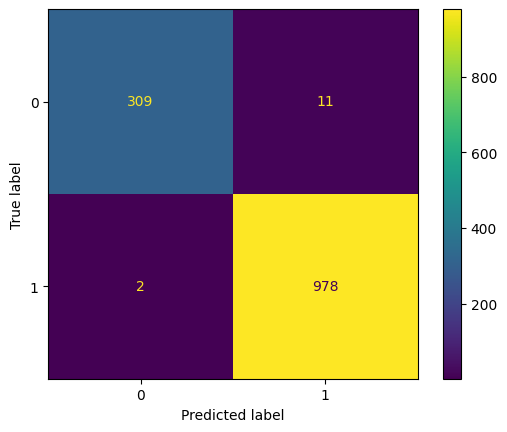

SVC_Grid
Name SVC(C=10, gamma=1, kernel='linear') 

--------- Estimator:  SVC(C=10, gamma=1, kernel='linear') --------------

Accuracy Score: 0.9907692307692307

Confusion Matrix:
 [[313   7]
 [  5 975]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       320
           1       0.99      0.99      0.99       980

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300


Mean accuracy:
98.77%

Standard deviation:
 1.76%


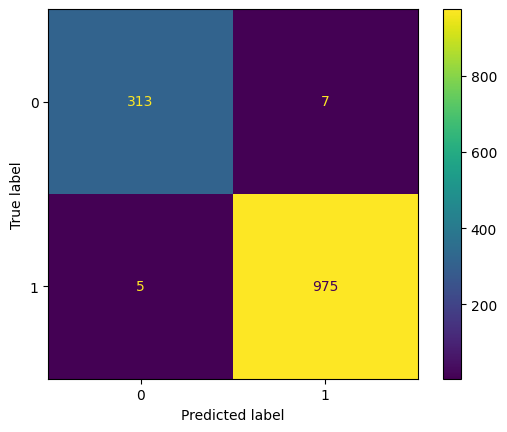

SVC_RS
Name SVC(C=10, gamma=1, kernel='linear') 

--------- Estimator:  SVC(C=10, gamma=1, kernel='linear') --------------

Accuracy Score: 0.9907692307692307

Confusion Matrix:
 [[313   7]
 [  5 975]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       320
           1       0.99      0.99      0.99       980

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300


Mean accuracy:
98.77%

Standard deviation:
 1.76%


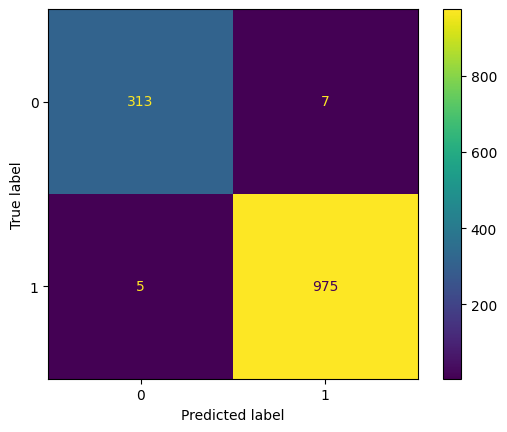

GaussianNB_Grid
Name GaussianNB(var_smoothing=1e-11) 

--------- Estimator:  GaussianNB(var_smoothing=1e-11) --------------

Accuracy Score: 0.9823076923076923

Confusion Matrix:
 [[313   7]
 [ 16 964]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       320
           1       0.99      0.98      0.99       980

    accuracy                           0.98      1300
   macro avg       0.97      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300


Mean accuracy:
98.47%

Standard deviation:
 1.61%


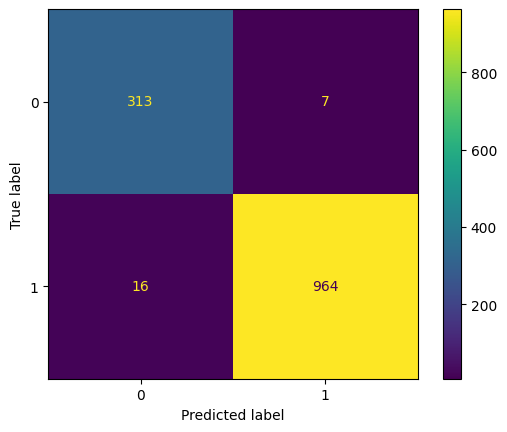

GaussianNB_RS
Name GaussianNB(var_smoothing=1e-11) 

--------- Estimator:  GaussianNB(var_smoothing=1e-11) --------------

Accuracy Score: 0.9823076923076923

Confusion Matrix:
 [[313   7]
 [ 16 964]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       320
           1       0.99      0.98      0.99       980

    accuracy                           0.98      1300
   macro avg       0.97      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300


Mean accuracy:
98.47%

Standard deviation:
 1.61%


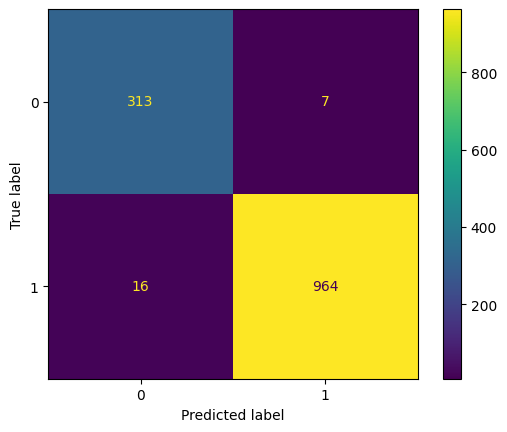

In [37]:
Hyper_Res = {'Estimator': [key for key in get_hyper_tuningPar], 'CVM': [], 'CVS': [], 'P_R': [], 'P_W': []}
for estimator in get_hyper_tuningPar.keys():
    print(estimator)
    name = get_hyper_tuningPar[estimator]
    print("Name", name, "\n")
    create_model(name,Hyper_Res)

In [38]:
Hyper_Res

{'Estimator': ['KNeighborsClassifier_Grid',
  'KNeighborsClassifier_RS',
  'DecisionTreeClassifier_Grid',
  'DecisionTreeClassifier_RS',
  'RandomForestClassifier_Grid',
  'RandomForestClassifier_RS',
  'SVC_Grid',
  'SVC_RS',
  'GaussianNB_Grid',
  'GaussianNB_RS'],
 'CVM': [0.9423537702607471,
  0.9408210007047216,
  0.9738548273431995,
  0.9769732205778717,
  0.9884601832276252,
  0.9900105708245243,
  0.9877026074700495,
  0.9877026074700495,
  0.9846546863988723,
  0.9846546863988723],
 'CVS': [0.028191265754038488,
  0.026829037019610254,
  0.02199042053564087,
  0.020488357500701323,
  0.014328623859079324,
  0.012906474598609378,
  0.017635614913572708,
  0.017635614913572708,
  0.01608623613231542,
  0.01608623613231542],
 'P_R': [0.9245901639344263,
  0.9250814332247557,
  0.9647435897435898,
  0.9654088050314465,
  0.996742671009772,
  0.9935691318327974,
  0.9842767295597484,
  0.9842767295597484,
  0.9513677811550152,
  0.9513677811550152],
 'P_W': [0.9618090452261306,
  0

In [39]:
HyperRes_df = pd.DataFrame(Hyper_Res)
HyperRes_df = HyperRes_df.set_index('Estimator')
HyperRes_df

CVM       CVS       P_R       P_W
Estimator                                                          
KNeighborsClassifier_Grid    0.942354  0.028191  0.924590  0.961809
KNeighborsClassifier_RS      0.940821  0.026829  0.925081  0.963746
DecisionTreeClassifier_Grid  0.973855  0.021990  0.964744  0.980769
DecisionTreeClassifier_RS    0.976973  0.020488  0.965409  0.986762
RandomForestClassifier_Grid  0.988460  0.014329  0.996743  0.985901
RandomForestClassifier_RS    0.990011  0.012906  0.993569  0.988878
SVC_Grid                     0.987703  0.017636  0.984277  0.992872
SVC_RS                       0.987703  0.017636  0.984277  0.992872
GaussianNB_Grid              0.984655  0.016086  0.951368  0.992791
GaussianNB_RS                0.984655  0.016086  0.951368  0.992791

Text(0, 0.5, 'Score')

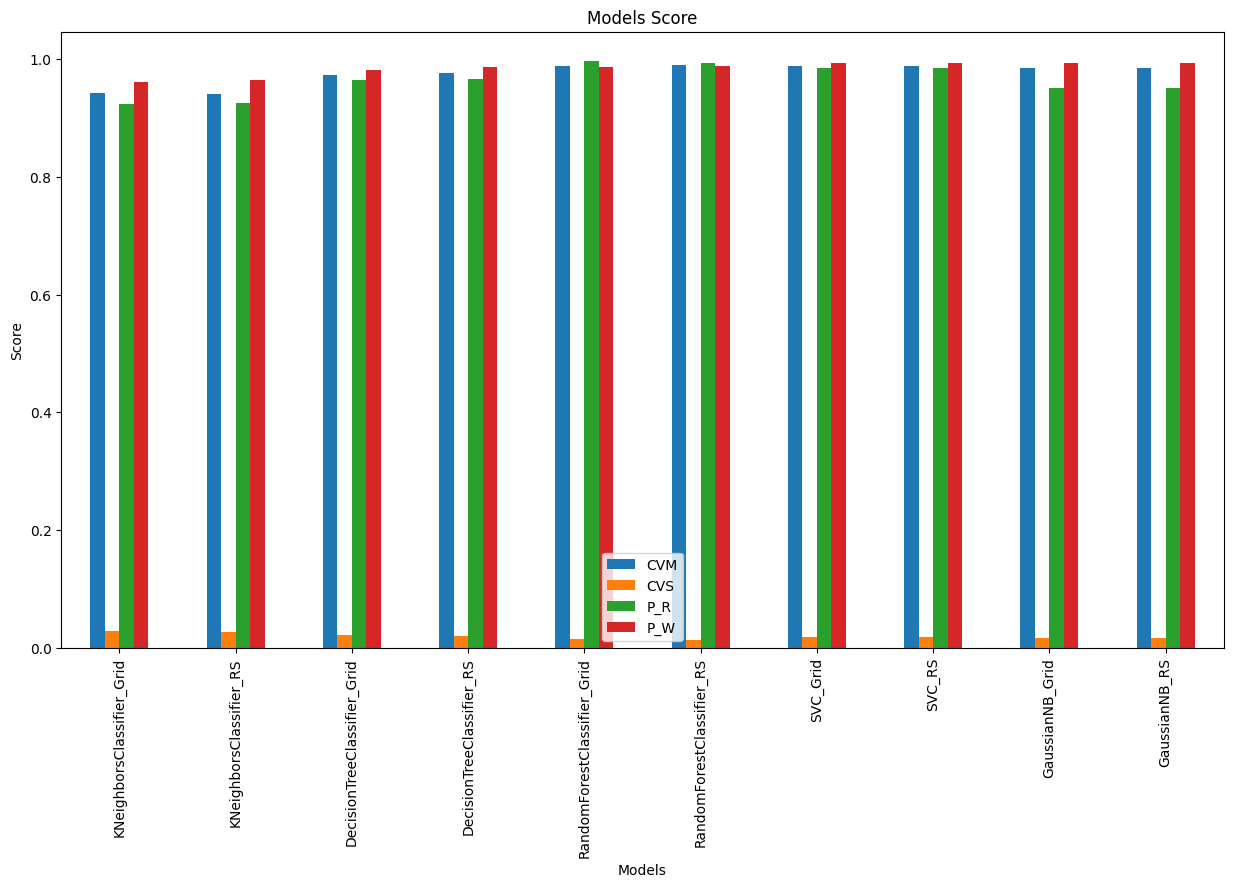

In [40]:
HyperRes_df.plot(kind="bar",figsize=(15, 8))
plt.title("Models Score")
plt.xlabel("Models")
plt.ylabel("Score")

### Concatenate the two result dataframes

In [41]:
Results_df.head()

CVM       CVS       P_R       P_W
Estimator                                                     
KNeighborsClassifier    0.938548  0.031917  0.904605  0.954819
DecisionTreeClassifier  0.983140  0.017745  0.968750  0.989796
RandomForestClassifier  0.995384  0.011013  1.000000  0.994924
SVC                     0.933915  0.033298  0.935484  0.942214
GaussianNB              0.980092  0.019344  0.937313  0.993782

In [42]:
HyperRes_df.head()

CVM       CVS       P_R       P_W
Estimator                                                          
KNeighborsClassifier_Grid    0.942354  0.028191  0.924590  0.961809
KNeighborsClassifier_RS      0.940821  0.026829  0.925081  0.963746
DecisionTreeClassifier_Grid  0.973855  0.021990  0.964744  0.980769
DecisionTreeClassifier_RS    0.976973  0.020488  0.965409  0.986762
RandomForestClassifier_Grid  0.988460  0.014329  0.996743  0.985901

In [43]:
frames = [Results_df, HyperRes_df]
#df = pd.concat(frames, ignore_index=True)
TotalRes_df = pd.concat(frames)
TotalRes_df

CVM       CVS       P_R       P_W
Estimator                                                          
KNeighborsClassifier         0.938548  0.031917  0.904605  0.954819
DecisionTreeClassifier       0.983140  0.017745  0.968750  0.989796
RandomForestClassifier       0.995384  0.011013  1.000000  0.994924
SVC                          0.933915  0.033298  0.935484  0.942214
GaussianNB                   0.980092  0.019344  0.937313  0.993782
KNeighborsClassifier_Grid    0.942354  0.028191  0.924590  0.961809
KNeighborsClassifier_RS      0.940821  0.026829  0.925081  0.963746
DecisionTreeClassifier_Grid  0.973855  0.021990  0.964744  0.980769
DecisionTreeClassifier_RS    0.976973  0.020488  0.965409  0.986762
RandomForestClassifier_Grid  0.988460  0.014329  0.996743  0.985901
RandomForestClassifier_RS    0.990011  0.012906  0.993569  0.988878
SVC_Grid                     0.987703  0.017636  0.984277  0.992872
SVC_RS                       0.987703  0.017636  0.984277  0.992872
GaussianNB_Grid              0.984655  0.016086  0.951368  0.992791
GaussianNB_RS                0.984655  0.016086  0.951368  0.992791

Text(0, 0.5, 'Score')

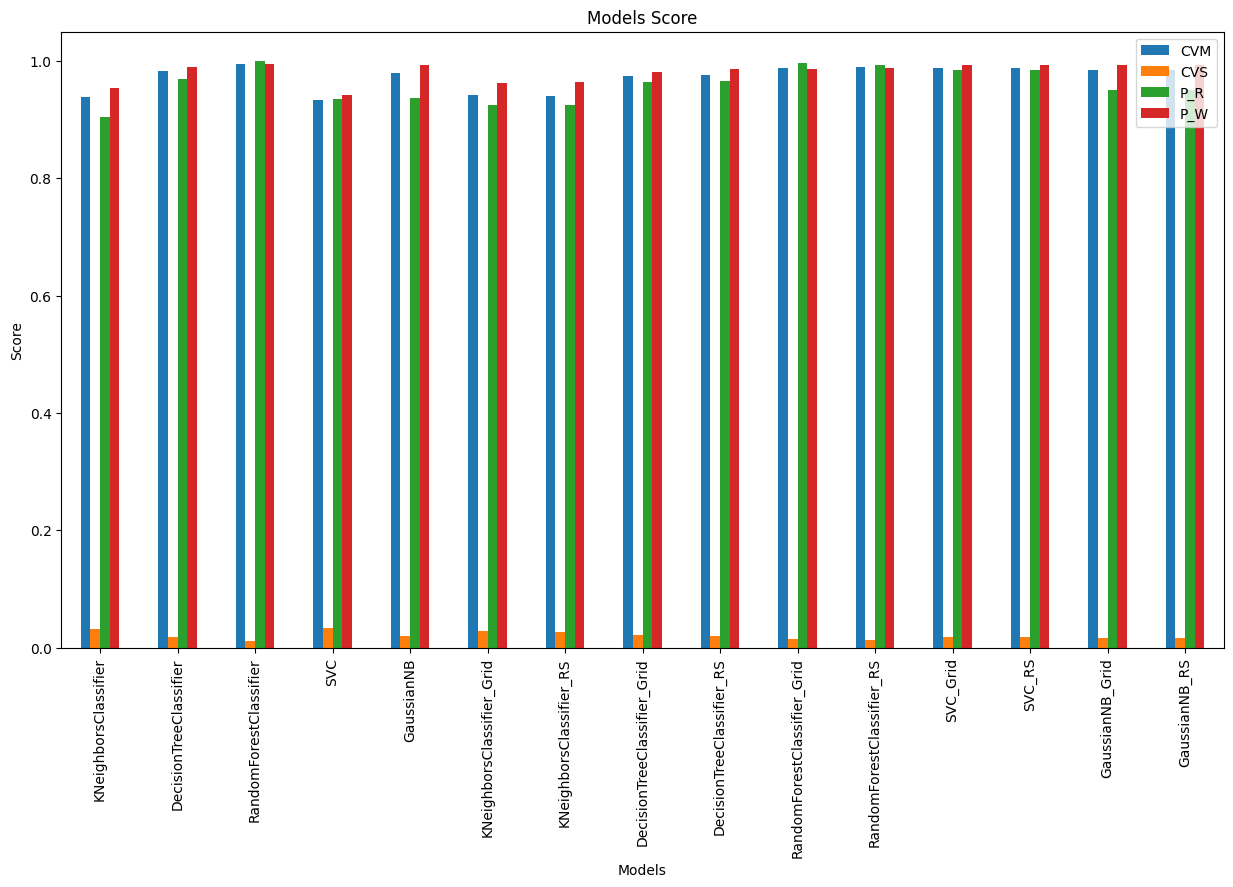

In [44]:
TotalRes_df.plot(kind="bar",figsize=(15, 8))
plt.title("Models Score")
plt.xlabel("Models")
plt.ylabel("Score")

In [45]:
#print(Results_df['CVS'])
TotalRes_CVS = TotalRes_df['CVS']
print(TotalRes_CVS)

Estimator
KNeighborsClassifier           0.031917
DecisionTreeClassifier         0.017745
RandomForestClassifier         0.011013
SVC                            0.033298
GaussianNB                     0.019344
KNeighborsClassifier_Grid      0.028191
KNeighborsClassifier_RS        0.026829
DecisionTreeClassifier_Grid    0.021990
DecisionTreeClassifier_RS      0.020488
RandomForestClassifier_Grid    0.014329
RandomForestClassifier_RS      0.012906
SVC_Grid                       0.017636
SVC_RS                         0.017636
GaussianNB_Grid                0.016086
GaussianNB_RS                  0.016086
Name: CVS, dtype: float64


Text(0, 0.5, 'Score')

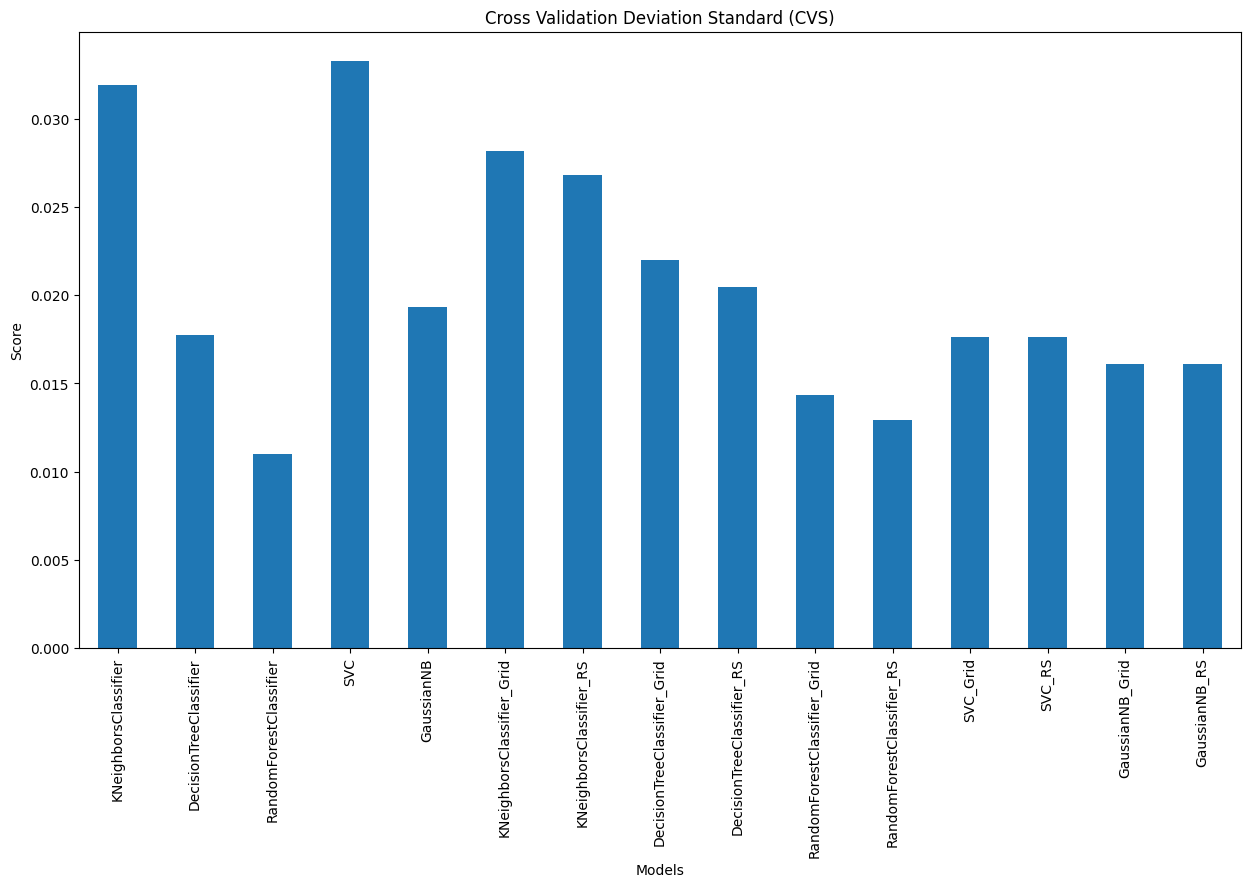

In [46]:
TotalRes_CVS.plot(kind="bar",figsize=(15, 8))
plt.title("Cross Validation Deviation Standard (CVS)")
plt.xlabel("Models")
plt.ylabel("Score")